#SCS 3546: Deep Learning - Spring 2023
#Final Project



##Project: Building a Fake Image Detector by using a Binary Classifier

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od


In [ ]:
# When you run this it will ask for username and key
od.download("https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kubernetes2021
Your Kaggle Key: ··········


100%|██████████| 431M/431M [00:04<00:00, 107MB/s]


In [ ]:
# Configure the plot format
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

##**1. Dataset Collection: (Two sets of data) one with real images and another with fake images.**

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
#Load and Explore the Dataset:


# Define the path to the downloaded dataset folder
dataset_path = "./real-and-fake-face-detection"

# List the subdirectories (real and fake images)
real_images_path = os.path.join(dataset_path, "real_and_fake_face_detection/real_and_fake_face/training_real")
fake_images_path = os.path.join(dataset_path, "real_and_fake_face_detection/real_and_fake_face/training_fake")

# List all files (images) in each subdirectory
real_images_files = os.listdir(real_images_path)
fake_images_files = os.listdir(fake_images_path)




##**2. Data Visualization**

5 samples of Real images:


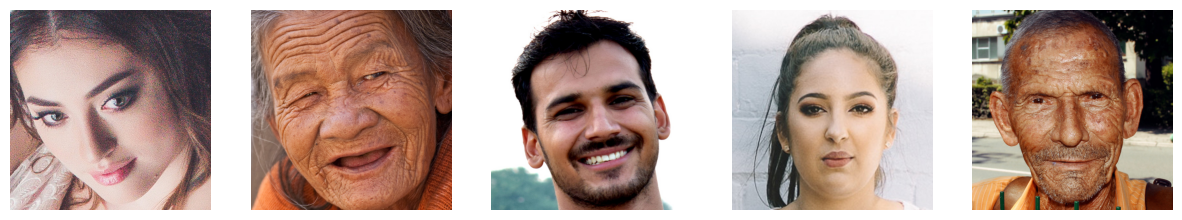



5 samples of Fake images:


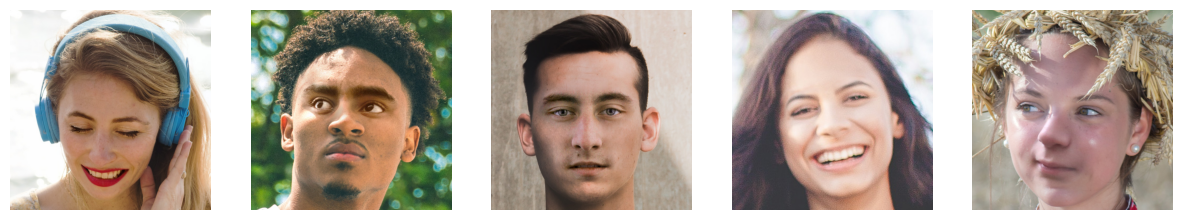

In [ ]:
#Visualize Sample Images:

def visualize_sample_images(image_dir, num_images=5):
    # Randomly select num_images from the image_dir
    selected_images = random.sample(os.listdir(image_dir), num_images)

    # Create a plot with num_images subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # Loop through the selected images and display them
    for i, image_name in enumerate(selected_images):
        image_path = os.path.join(image_dir, image_name)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')

    plt.show()

print('5 samples of Real images:')

# Visualize 5 sample real images
visualize_sample_images(real_images_path, num_images=5)

print('\n')
print('5 samples of Fake images:')
# Visualize 5 sample fake images
visualize_sample_images(fake_images_path, num_images=5)


Number of real images: 1081
Number of fake images: 960
Percentage of real images: 52.96%
Percentage of fake images: 47.04%


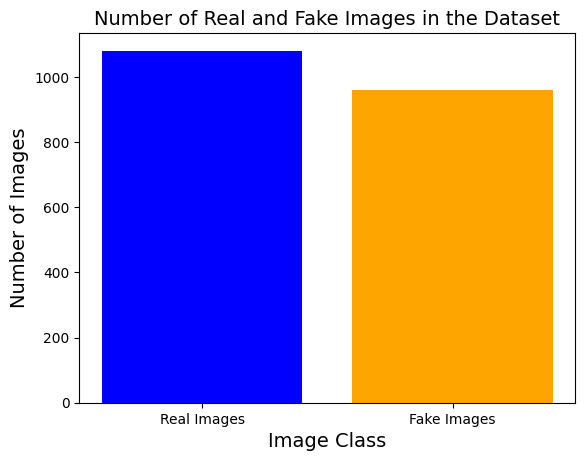

In [ ]:
#Balance check on the dataset:

# Count the number of images in each class
num_real_images = len(real_images_files)
num_fake_images = len(fake_images_files)

# Calculate the percentage of samples in each class
percentage_real_images = (num_real_images / (num_real_images + num_fake_images)) * 100
percentage_fake_images = (num_fake_images / (num_real_images + num_fake_images)) * 100

print(f"Number of real images: {num_real_images}")
print(f"Number of fake images: {num_fake_images}")
print(f"Percentage of real images: {percentage_real_images:.2f}%")
print(f"Percentage of fake images: {percentage_fake_images:.2f}%")


# Create a bar chart
plt.bar(['Real Images', 'Fake Images'], [num_real_images, num_fake_images], color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Image Class')
plt.ylabel('Number of Images')
plt.title('Number of Real and Fake Images in the Dataset')

# Show the plot
plt.show()

##**3. Data Preprocessing: Preprocess the images, including resizing**

> Preprocessing for VGG16 and ResNet-50

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image


#Preprocessing for Vgg16 and ResNet-50
#Setting the image size

target_size = (224, 224)

# To resize all the images:
def resize_images(image_dir, target_size):
    # Create a list to store the resized images
    resized_images = []

    # Loop through all the images in the image_dir
    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)
        image = Image.open(image_path)

        # Resize the image to the target_size (e.g., (224, 224) for 224x224 pixels)
        resized_image = image.resize(target_size)

        # Convert the resized image to a numpy array and append it to the list
        resized_images.append(np.array(resized_image))

    return np.array(resized_images)


# Define a Data Preprocessing Function without Normalization

def data_preprocessing(image_dir, target_size=(224, 224)):
    # Step 1: Resize images to the target size
    resized_images = resize_images(image_dir, target_size)

    return resized_images



# Define the path to the downloaded dataset folder
dataset_path = "./real-and-fake-face-detection"

# Load and preprocess real images
real_images_path = os.path.join(dataset_path, "real_and_fake_face_detection/real_and_fake_face/training_real")
real_images = data_preprocessing(real_images_path)

# Load and preprocess fake images
fake_images_path = os.path.join(dataset_path, "real_and_fake_face_detection/real_and_fake_face/training_fake")
fake_images = data_preprocessing(fake_images_path)


5 samples of Resized Real images:


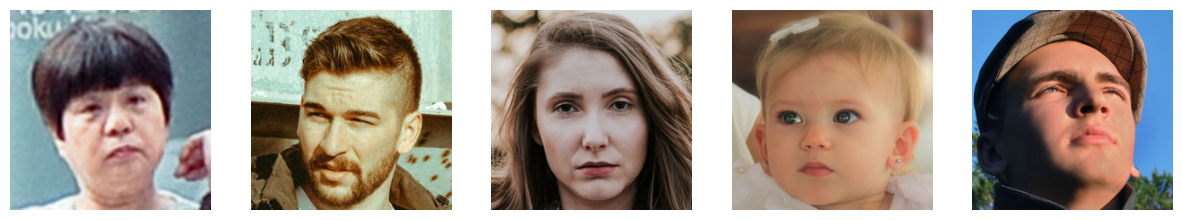


)
5 samples of Resized Fake images:


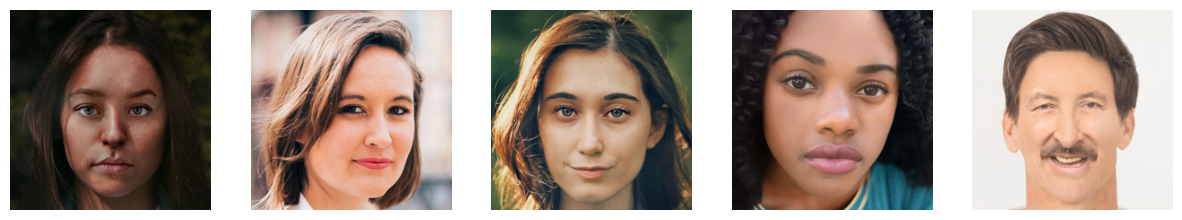

In [ ]:
# To display Resized images
def display_resized_samples(images_array, num_samples=5):
    num_images = images_array.shape[0]

    # Randomly select num_samples indices from the range of the number of images
    selected_indices = np.random.choice(num_images, num_samples, replace=False)

    # Create a plot with num_samples subplots
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    # Loop through the selected indices and display the corresponding images
    for i, idx in enumerate(selected_indices):
        axes[i].imshow(images_array[idx])
        axes[i].axis('off')

    plt.show()

print('5 samples of Resized Real images:')
# Display 5 random samples from the resized real images
display_resized_samples(real_images)

print('\n)')
print('5 samples of Resized Fake images:')
# Display 5 random samples from the resized fake images
display_resized_samples(fake_images)


Create a unified dataset that pairs each image with its respective label:
>combining the real and fake images along with their corresponding labels
> "0" for Real image, "1"for Fake image).

In [ ]:

# Combine real and fake images and create labels (0 for real images and 1 for fake images)
all_images = np.concatenate([real_images, fake_images])
labels = np.concatenate([np.zeros(len(real_images)), np.ones(len(fake_images))])

>Preprocessing For GoogLeNet.(Inception model) --> resize the image to (299 x 299)

In [ ]:

# New target size for Inception model
target_size_inception = (299, 299)

# Resize images to the target size for Inception
def resize_images_299(image_dir, target_size_inception):
    resized_images = []

    for image_name in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_name)
        image = Image.open(image_path)
        resized_image = image.resize(target_size_inception)
        resized_images.append(np.array(resized_image))

    return np.array(resized_images)

# Define the path to the downloaded dataset folder with a new variable name data_dir
data_dir = "./real-and-fake-face-detection"

# Load and preprocess real images for 299x299
real_images_path_299 = os.path.join(data_dir, "real_and_fake_face_detection/real_and_fake_face/training_real")
real_images_299 = resize_images_299(real_images_path_299, target_size_inception)

# Load and preprocess fake images for 299x299
fake_images_path_299 = os.path.join(data_dir, "real_and_fake_face_detection/real_and_fake_face/training_fake")
fake_images_299 = resize_images_299(fake_images_path_299, target_size_inception)



Resized image (299 X 299) for application in GoogLeNet (Inception v3)


Number of real images: 1081
Number of fake images: 960


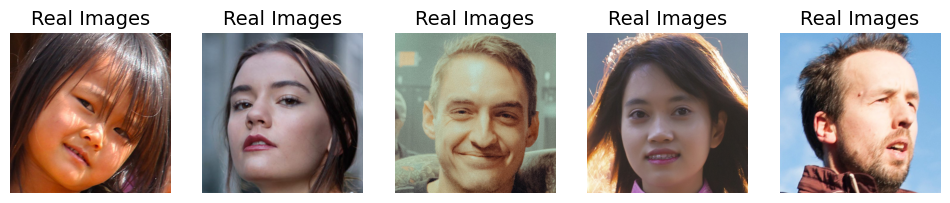

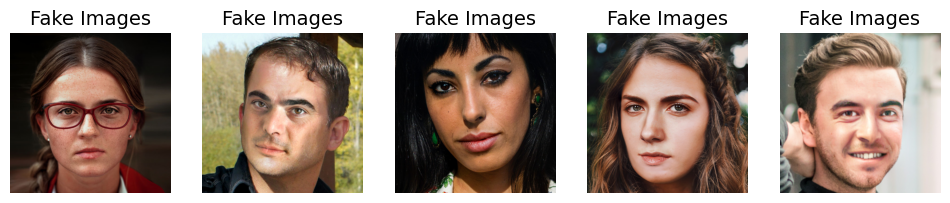

In [ ]:
# Double check on the resized image (299 X 299) for GoogLeNet (Inception v3)

print('Resized image (299 X 299) for application in GoogLeNet (Inception v3)')
print('\n')
real_images_count = len(os.listdir(real_images_path_299))
fake_images_count = len(os.listdir(fake_images_path_299))

print("Number of real images:", real_images_count)
print("Number of fake images:", fake_images_count)

# Plot some sample images
def plot_sample_images(images, title):
    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.title(title)
        plt.axis("off")
    plt.show()



# Plot sample real images
plot_sample_images(real_images_299, "Real Images")

# Plot sample fake images
plot_sample_images(fake_images_299, "Fake Images")


In [ ]:
# Create labels for real (1) and fake (0) images (299 X 299)
real_labels_299 = np.ones(real_images_count)
fake_labels_299 = np.zeros(fake_images_count)

# Combine real and fake images and labels
all_images_299 = np.concatenate((real_images_299, fake_images_299), axis=0)
all_labels_299 = np.concatenate((real_labels_299, fake_labels_299), axis=0)


##**4. Data Splitting:**
> Using Stratified K-fold in such a way that each fold will have a similar proportion of real and fake images

> Data Splitting for Image size(224 X 224):

>Using the concept of Data Generator to improve the generalization and performance of the model and also achieving memory efficiency during training with limited resources

> The trainining and validation dataset are  shuffled after performing Stratified KFold split, ensuring that there is no data leakage from the test set to the training and validation sets.

>https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

>Normalizing pixel values: To scale the pixel values to a range of [0, 1]: dividing them by 255 in the case of 8-bit images regarding the image size = (224, 224) or (299 x 299).


In [ ]:
from sklearn.model_selection import train_test_split

#Data Splitting for Image size(224 X 224):


# Split the data into training, validation, and test sets with stratified sampling and shuffling
X_train_val, X_test, y_train_val, y_test = train_test_split(all_images, labels, test_size=0.2, random_state=42, shuffle=True, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=True, stratify=y_train_val)


# Print the number and shape of the sets for Image size(224 X 224)
print('Image size(224 X 224)')
print("Training set - Number of samples:", len(X_train))
print("Training set - Shape of samples:", X_train.shape)
print("Validation set - Number of samples:", len(X_val))
print("Validation set - Shape of samples:", X_val.shape)
print("Test set - Number of samples:", len(X_test))
print("Test set - Shape of samples:", X_test.shape)





Image size(224 X 224)
Training set - Number of samples: 1224
Training set - Shape of samples: (1224, 224, 224, 3)
Validation set - Number of samples: 408
Validation set - Shape of samples: (408, 224, 224, 3)
Test set - Number of samples: 409
Test set - Shape of samples: (409, 224, 224, 3)


In [ ]:


# Calculate class label ratios per dataset for Image size(224 X 224):
num_real_images_train = np.sum(y_train == 0)
num_fake_images_train = np.sum(y_train == 1)

num_real_images_val = np.sum(y_val == 0)
num_fake_images_val = np.sum(y_val == 1)

num_real_images_test = np.sum(y_test == 0)
num_fake_images_test = np.sum(y_test == 1)

ratio_real_images_train = num_real_images_train / len(X_train) * 100
ratio_fake_images_train = num_fake_images_train / len(X_train) * 100

ratio_real_images_val = num_real_images_val / len(X_val) * 100
ratio_fake_images_val = num_fake_images_val / len(X_val) * 100

ratio_real_images_test = num_real_images_test / len(X_test) * 100
ratio_fake_images_test = num_fake_images_test / len(X_test) * 100

# Print the corrected class distributions
print("Class Distribution in Training Set:")
print(f"Percentage of real images: {ratio_real_images_train:.2f}%")
print(f"Percentage of fake images: {ratio_fake_images_train:.2f}%")
print()

print("Class Distribution in Validation Set:")
print(f"Percentage of real images: {ratio_real_images_val:.2f}%")
print(f"Percentage of fake images: {ratio_fake_images_val:.2f}%")
print()

print("Class Distribution in Test Set:")
print(f"Percentage of real images: {ratio_real_images_test:.2f}%")
print(f"Percentage of fake images: {ratio_fake_images_test:.2f}%")



Class Distribution in Training Set:
Percentage of real images: 52.94%
Percentage of fake images: 47.06%

Class Distribution in Validation Set:
Percentage of real images: 52.94%
Percentage of fake images: 47.06%

Class Distribution in Test Set:
Percentage of real images: 53.06%
Percentage of fake images: 46.94%


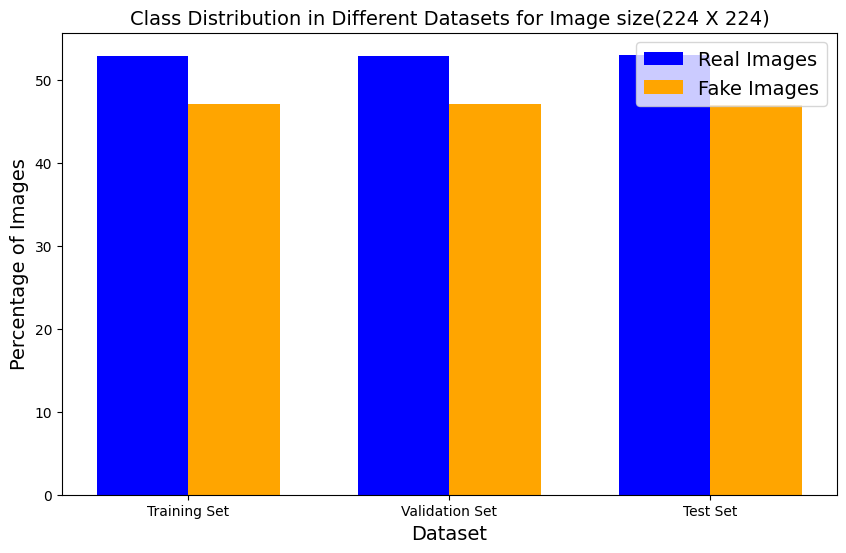

In [ ]:
# Plot the class distributions Image size(224 X 224):
labels = ['Training Set', 'Validation Set', 'Test Set']
real_ratios = [ratio_real_images_train, ratio_real_images_val, ratio_real_images_test]
fake_ratios = [ratio_fake_images_train, ratio_fake_images_val, ratio_fake_images_test]

width = 0.35
x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, real_ratios, width, label='Real Images', color='blue')
rects2 = ax.bar([pos + width for pos in x], fake_ratios, width, label='Fake Images', color='orange')

ax.set_ylabel('Percentage of Images')
ax.set_xlabel('Dataset')
ax.set_title('Class Distribution in Different Datasets for Image size(224 X 224)')
ax.set_xticks([pos + width / 2 for pos in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()







In [ ]:


# Convert the data of image size = (224 X 224) to float32 to ensure division works correctly
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values to the range [0, 1]
X_train /= 255.0
X_val /= 255.0
X_test /= 255.0


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    rotation_range=20,       # Random rotation in the range [-20, 20] degrees
    width_shift_range=0.1,   # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of the height
    shear_range=0.2,         # Random shear transformation in the range [-20, 20] degrees
    zoom_range=0.2,          # Random zoom in the range [0.8, 1.2]
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill any newly created pixels after rotation or shifting
)

# Create an ImageDataGenerator for validation and testing (no data augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Batch size for training and validation
batch_size = 32

# Create the training data generator
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=batch_size,
    shuffle=True
)

# Create the validation data generator
val_generator = val_test_datagen.flow(
    X_val, y_val,
    batch_size=batch_size,
    shuffle=False
)

# Create the test data generator
test_generator = val_test_datagen.flow(
    X_test, y_test,
    batch_size=batch_size,
    shuffle=False
)

# Check the shape of a batch of augmented images
augmented_images, _ = next(train_generator)
print("Shape of augmented images batch for image size = 224 X 224:", augmented_images.shape)


Shape of augmented images batch for image size = 224 X 224: (32, 224, 224, 3)


> Data Splitting for Image size (299 X 299) & Applying Image Data Generator:

In [ ]:
# Create labels for real (1) and fake (0) images
real_labels_299 = np.ones(real_images_count)
fake_labels_299 = np.zeros(fake_images_count)

# Combine real and fake images and labels
all_images_299 = np.concatenate((real_images_299, fake_images_299), axis=0)
all_labels_299 = np.concatenate((real_labels_299, fake_labels_299), axis=0)


from sklearn.model_selection import train_test_split

# Split the dataset into train-validation-test sets
train_images, val_test_images, train_labels, val_test_labels = train_test_split(all_images_299, all_labels_299, test_size=0.3, random_state=42, stratify=all_labels_299)
val_images, test_images, val_labels, test_labels = train_test_split(val_test_images, val_test_labels, test_size=0.5, random_state=42)

# Print the number of samples and shape for each set
print(f"Training set - Number of samples: {train_images.shape[0]}")
print(f"Training set - Shape of samples: {train_images.shape}")

print(f"Validation set - Number of samples: {val_images.shape[0]}")
print(f"Validation set - Shape of samples: {val_images.shape}")

print(f"Test set - Number of samples: {test_images.shape[0]}")
print(f"Test set - Shape of samples: {test_images.shape}")


Training set - Number of samples: 1428
Training set - Shape of samples: (1428, 299, 299, 3)
Validation set - Number of samples: 306
Validation set - Shape of samples: (306, 299, 299, 3)
Test set - Number of samples: 307
Test set - Shape of samples: (307, 299, 299, 3)


In [ ]:
# Calculate class label ratios for training set
num_real_images_train = np.sum(train_labels == 0)
num_fake_images_train = np.sum(train_labels == 1)

ratio_real_images_train = num_real_images_train / len(train_images) * 100
ratio_fake_images_train = num_fake_images_train / len(train_images) * 100

# Calculate class label ratios for validation set
num_real_images_val = np.sum(val_labels == 0)
num_fake_images_val = np.sum(val_labels == 1)

ratio_real_images_val = num_real_images_val / len(val_images) * 100
ratio_fake_images_val = num_fake_images_val / len(val_images) * 100

# Calculate class label ratios for test set
num_real_images_test = np.sum(test_labels == 0)
num_fake_images_test = np.sum(test_labels == 1)

ratio_real_images_test = num_real_images_test / len(test_images) * 100
ratio_fake_images_test = num_fake_images_test / len(test_images) * 100

# Print the class label ratios for each dataset
print("Class Distribution in Training Set:")
print(f"Percentage of real images: {ratio_real_images_train:.2f}%")
print(f"Percentage of fake images: {ratio_fake_images_train:.2f}%")
print()

print("Class Distribution in Validation Set:")
print(f"Percentage of real images: {ratio_real_images_val:.2f}%")
print(f"Percentage of fake images: {ratio_fake_images_val:.2f}%")
print()

print("Class Distribution in Test Set:")
print(f"Percentage of real images: {ratio_real_images_test:.2f}%")
print(f"Percentage of fake images: {ratio_fake_images_test:.2f}%")


Class Distribution in Training Set:
Percentage of real images: 47.06%
Percentage of fake images: 52.94%

Class Distribution in Validation Set:
Percentage of real images: 47.39%
Percentage of fake images: 52.61%

Class Distribution in Test Set:
Percentage of real images: 46.58%
Percentage of fake images: 53.42%


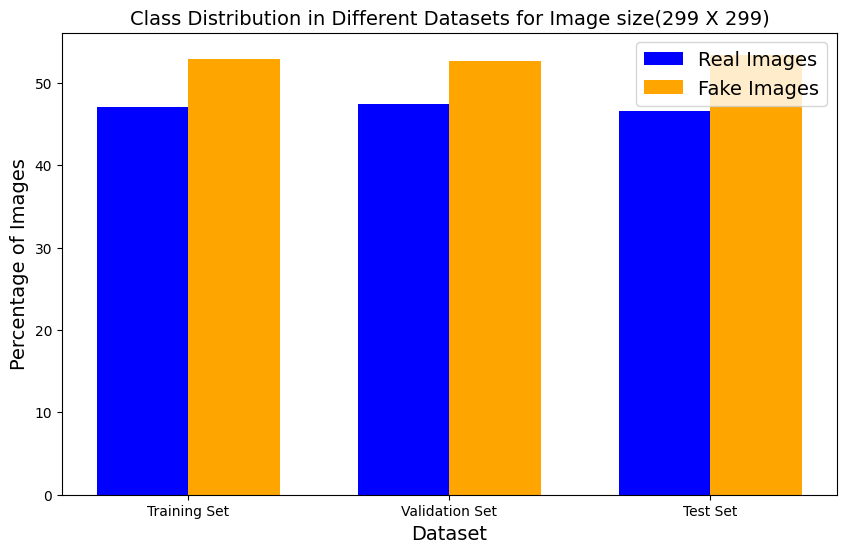

In [ ]:
# Plot the class distributions Image size(299 X 299):
labels = ['Training Set', 'Validation Set', 'Test Set']
real_ratios = [ratio_real_images_train, ratio_real_images_val, ratio_real_images_test]
fake_ratios = [ratio_fake_images_train, ratio_fake_images_val, ratio_fake_images_test]

width = 0.35
x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, real_ratios, width, label='Real Images', color='blue')
rects2 = ax.bar([pos + width for pos in x], fake_ratios, width, label='Fake Images', color='orange')

ax.set_ylabel('Percentage of Images')
ax.set_xlabel('Dataset')
ax.set_title('Class Distribution in Different Datasets for Image size(299 X 299)')
ax.set_xticks([pos + width / 2 for pos in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


>Normalizing pixel values
>To scale the pixel values to a range of [0, 1]: dividing them by 255 in the case of 8-bit images

In [ ]:
#Convert the data of image size = (299 X 299) to float32

# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for training data with data augmentation
train_datagen_299 = ImageDataGenerator(
    rescale=1.0 / 255.0,        # Normalize pixel values to [0, 1]
    rotation_range=30,         # Randomly rotate images in the range [0, 30] degrees
    width_shift_range=0.1,     # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,    # Randomly shift images vertically (fraction of total height)
    shear_range=0.2,           # Shear transformations
    zoom_range=0.2,            # Randomly zoom images
    horizontal_flip=True,      # Randomly flip images horizontally
    fill_mode='nearest'        # Fill newly created pixels after rotation or shifts
)

# Create an ImageDataGenerator for validation and test data (only rescaling, no augmentation)
val_test_datagen_299 = ImageDataGenerator(
    rescale=1.0 / 255.0
)

# Flow training, validation, and test images with corresponding labels using the generators
batch_size = 32

# Training data generator
train_generator_299 = train_datagen_299.flow(
    train_images, train_labels,
    batch_size=batch_size
)

# Validation data generator
val_generator_299 = val_test_datagen_299.flow(
    val_images, val_labels,
    batch_size=batch_size,
    shuffle=False
)

# Test data generator
test_generator_299 = val_test_datagen_299.flow(
    test_images, test_labels,
    batch_size=batch_size,
    shuffle=False  # Do not shuffle test data
)

# Check the shape of a batch of augmented images (299 x 299)
augmented_images, _ = next(train_generator_299)
print("Shape of augmented images batch for image size = 299 X 299:", augmented_images.shape)

Shape of augmented images batch for image size = 299 X 299: (32, 299, 299, 3)


#**5.Model Selection +  Model Training  +  Evaluation ( 3 Parts)**
>**5.1 GoogLeNet Inception v3**

>**5.2 ResNet-50**

>**5.3 VGG16**



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model, Sequential

from keras.layers import Dense
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

from tensorflow.keras.applications.vgg16 import VGG16
from keras.optimizers import Adam, Nadam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import plot_model

from keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
    Input,
    GlobalAveragePooling2D,
)

from sklearn.metrics import (
    auc,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    accuracy_score,
    f1_score
)


from tensorflow.keras.models import clone_model

#set the random seed for reproducibility
tf.random.set_seed(42)


#**5.1 GoogLeNet Inception v3**

##InceptionV3 - Model 1 (Frozen All the layers)

>https://arxiv.org/abs/1512.00567v3
>https://github.com/pytorch/vision/blob/6db1569c89094cf23f3bc41f79275c45e9fcb3f3/torchvision/models/inception.py#L210
>https://paperswithcode.com/method/inception-v3-module#:~:text=Inception%2Dv3%20Module%20is%20an,to%20promote%20high%20dimensional%20representations.
>https://github.com/Sakib1263/Inception-InceptionResNet-SEInception-SEInceptionResNet-1D-2D-Tensorflow-Keras


In [ ]:
from tensorflow.keras.applications import InceptionV3

#InceptionV3 - Model 1 (Frozen All the layers)

# Load the pre-trained Inception v3 model as our "base model", excluding the top classification layers
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Print the model summary to look at the layers
base_model_inception.summary()

print("\n")

# Get the number of layers in this base model
num_layers = len(base_model_inception.layers)
print("Number of layers in Inception v3 base model:", num_layers)

print("\n")

#Freeze all the layers in the base model of Inception v3
for layer in base_model_inception.layers:
    layer.trainable = False


# Print the status of trainable layers in the base model
for i, layer in enumerate(base_model_inception.layers):
    #print(i, layer.name, layer.trainable)
    print(i, f"{layer.name}: Trainable={layer.trainable}")

print('\n')

# Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical", input_shape=(299, 299, 3)),
    RandomRotation(0.2)
])


# Build the sequential model by adding the base model of Inception v3 and custom dense layers

model = Sequential()
model.add(data_augmentation)
model.add(base_model_inception)

#GlobalAveragePooling2D reduces the spatial dimensions to 1x1
#Do not need to add a flatten dense layer
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu',kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#Output layer
model.add(Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()


87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:
# Plot the model architecture of Inception v3
# plot_model(base_model_inception, to_file='base_model_inception.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model

optimizer=keras.optimizers.Adam(learning_rate=0.001)

# binary cross-entropy loss function is used to measure the difference between
# the predicted probability and the true label for binary classification tasks.

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

# Train the model


# Define the number of epochs
epochs = 50

batch_size=32


#Use early stopping callback to monitor the validation accuracy and stop training
#if the validation accuracy does not improve for "patience" number of epochs.
#Early stopping helps to prevent overfitting
# Define the patience for early stopping
patience = 10

# Create the EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)


history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(val_images, val_labels), callbacks=[early_stopping])


Epoch 1/50
45/45 [==============================] - 20s 117ms/step - loss: 1.0403 - accuracy: 0.5448 - val_loss: 0.8432 - val_accuracy: 0.5196
Epoch 2/50
45/45 [==============================] - 2s 39ms/step - loss: 0.7881 - accuracy: 0.5973 - val_loss: 0.9159 - val_accuracy: 0.5392
Epoch 3/50
45/45 [==============================] - 2s 38ms/step - loss: 0.6948 - accuracy: 0.6092 - val_loss: 0.8448 - val_accuracy: 0.5556
Epoch 4/50
45/45 [==============================] - 2s 37ms/step - loss: 0.6659 - accuracy: 0.6303 - val_loss: 0.7933 - val_accuracy: 0.5621
Epoch 5/50
45/45 [==============================] - 2s 35ms/step - loss: 0.6672 - accuracy: 0.6261 - val_loss: 0.7503 - val_accuracy: 0.5359
Epoch 6/50
45/45 [==============================] - 2s 35ms/step - loss: 0.6361 - accuracy: 0.6548 - val_loss: 0.7461 - val_accuracy: 0.5425
Epoch 7/50
45/45 [==============================] - 2s 35ms/step - loss: 0.6387 - accuracy: 0.6359 - val_loss: 0.7384 - val_accuracy: 0.5588
Epoch 8/50


In [ ]:
#Model Evaluation:

# Calculate the average training loss and accuracy
average_train_loss = sum(history.history['loss']) / len(history.history['loss'])
average_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])

# Print the final training loss and accuracy
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

print(f"Average Training Loss: {average_train_loss:.4f}")
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")

print('\n')
# Evaluate the model on the test set
print('Model Evaluation on test :')
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print('\n')



Average Training Loss: 0.6447
Average Training Accuracy: 0.6525
Final Training Loss: 0.6047
Final Training Accuracy: 0.6695


Model Evaluation on test :
10/10 [==============================] - 1s 105ms/step - loss: 0.7088 - accuracy: 0.5863
Test Loss: 0.7088
Test Accuracy: 0.5863




In [ ]:
#Create a function to plot learning curves

def plot_learning_curves(history):
  """Plots learning curves from model training.
  """

  # plot accuracies
  y_train_accuracy = history.history['accuracy']
  y_val_accuracy = history.history['val_accuracy']
  x = [epoch for epoch in range(1, len(y_train_accuracy) + 1)]

  plt.plot(x, y_train_accuracy, label = "Training")
  plt.plot(x, y_val_accuracy, label = "Validation")
  plt.legend()

  plt.xlabel("Epoch")
  plt.ylabel("Classification Accuracy")
  plt.title("Learning Curves: Accuracy")

  plt.show()

  # plot loss
  y_train_loss = history.history['loss']
  y_val_loss = history.history['val_loss']
  x = [epoch for epoch in range(1, len(y_train_loss) + 1)]

  plt.plot(x, y_train_loss, label = "Training")
  plt.plot(x, y_val_loss, label = "Validation")
  plt.legend()

  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Learning Curves: Loss")

  plt.show()

# To call the learning curve function
plot_learning_curves(history)

NameError: ignored

In [ ]:
# Create a function that calculates the accuracy and roc for inception_v3

def accuracy_roc_inception(model, test_images, test_labels):
    # Make predictions on the test set and extract probability predictions
    y_pred_prob = model.predict(test_images)

    # Flatten the probability predictions to get a 1-dimension array.
    y_pred_prob = y_pred_prob.flatten()

    print('\n')

    # Calculate the accuracy score
    # Convert probabilities into binary class labels
    # If the probability >= 0.5, it is a positive prediction (fake image)
    # and assign a class label of 1, otherwise, it will be a class label of 0 (real image)
    y_pred_labels = (y_pred_prob >= 0.5).astype(int)
    accuracy = accuracy_score(test_labels, y_pred_labels)

    print(f"Accuracy Score: {accuracy:.4f}")

    # Calculate the ROC-AUC score to get Area Under the ROC Curve (AUC)
    # using predicted probabilities for the positive class (fake images)
    roc_auc = roc_auc_score(test_labels, y_pred_prob)

    print(f"ROC-AUC Score: {roc_auc:.4f}")

    print('\n')

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(test_labels, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


10/10 [==============================] - 2s 24ms/step


Accuracy Score: 0.5863
ROC-AUC Score: 0.6249




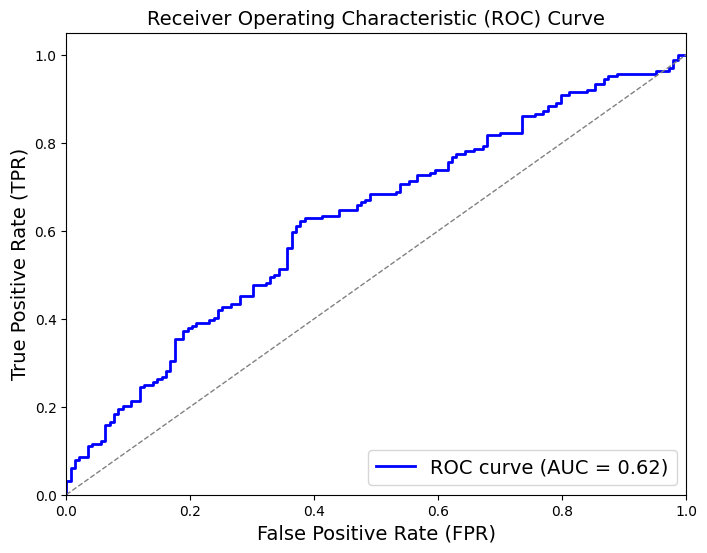

In [ ]:
# To call the accuracy & roc function
accuracy_roc_inception(model, test_images, test_labels)


In [ ]:
# Create a copy of the model and assign it to Model_1_InceptionV3
Model_1_InceptionV3 = clone_model(model)
Model_1_InceptionV3.build()

# Save the model architecture to a JSON file
model_json = model.to_json()
with open("Model_1_InceptionV3_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("Model_1_InceptionV3_weights.h5")

print("Model 1 with InceptionV3 has been saved.")



Model 1 with InceptionV3 has been saved.


This Model 1 does not use the pre-trained Inception model. The training accuracy and the accuracy score is below than 70%, therefore this is not a good model.



##InceptionV3 - Model 2 (Unfreeze All the Layers)

0 input_1: Trainable=True
1 conv2d: Trainable=True
2 batch_normalization: Trainable=True
3 activation: Trainable=True
4 conv2d_1: Trainable=True
5 batch_normalization_1: Trainable=True
6 activation_1: Trainable=True
7 conv2d_2: Trainable=True
8 batch_normalization_2: Trainable=True
9 activation_2: Trainable=True
10 max_pooling2d: Trainable=True
11 conv2d_3: Trainable=True
12 batch_normalization_3: Trainable=True
13 activation_3: Trainable=True
14 conv2d_4: Trainable=True
15 batch_normalization_4: Trainable=True
16 activation_4: Trainable=True
17 max_pooling2d_1: Trainable=True
18 conv2d_8: Trainable=True
19 batch_normalization_8: Trainable=True
20 activation_8: Trainable=True
21 conv2d_6: Trainable=True
22 conv2d_9: Trainable=True
23 batch_normalization_6: Trainable=True
24 batch_normalization_9: Trainable=True
25 activation_6: Trainable=True
26 activation_9: Trainable=True
27 average_pooling2d: Trainable=True
28 conv2d_5: Trainable=True
29 conv2d_7: Trainable=True
30 conv2d_10: Traina

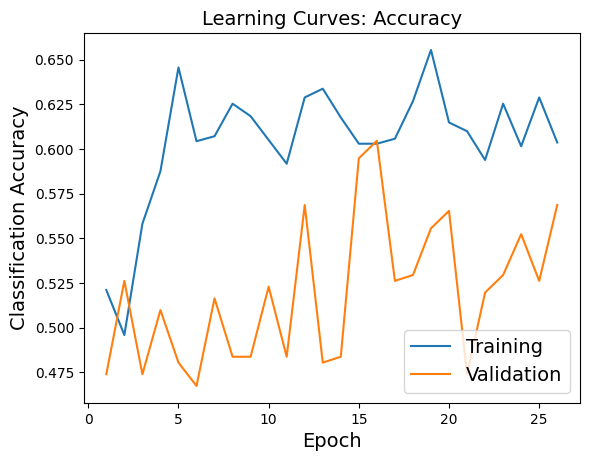

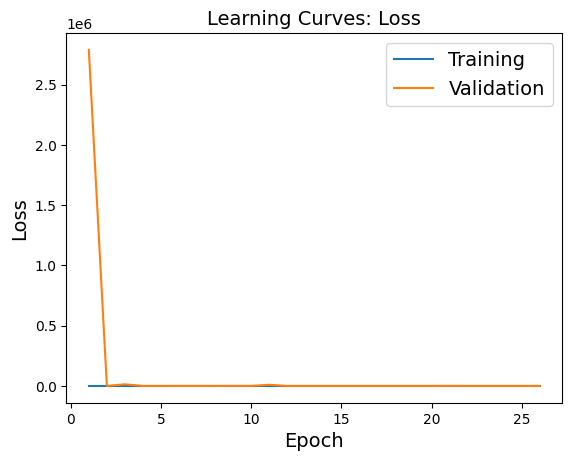

10/10 [==============================] - 1s 24ms/step


Accuracy Score: 0.5635
ROC-AUC Score: 0.5793




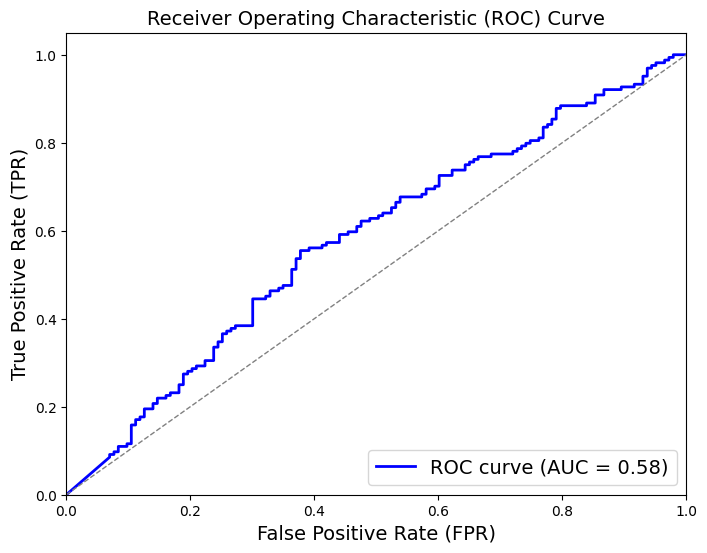

In [ ]:


#InceptionV3 - Model 2 (Unfreeze All the layers)

#clear the name counters
tf.keras.backend.clear_session()

# Load the pre-trained Inception v3 model as our "base model", excluding the top classification layers
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


# Unfreeze all layers in the base model
base_model_inception.trainable = True

# Print the status of trainable layers in the base model
for i, layer in enumerate(base_model_inception.layers):
    #print(i, layer.name, layer.trainable)
    print(i, f"{layer.name}: Trainable={layer.trainable}")

print('\n')

#Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical", input_shape=(299, 299, 3)),
    RandomRotation(0.2)
])


# Build the sequential model by adding the base model of Inception v3 and custom dense layers

model = Sequential()
model.add(data_augmentation)
model.add(base_model_inception)

#GlobalAveragePooling2D reduces the spatial dimensions to 1x1
#Do not need to add a flatten dense layer
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu',kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#Output layer
model.add(Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

print('\n')

# Compile the model

optimizer=keras.optimizers.Adam(learning_rate=0.001)

# binary cross-entropy loss function is used to measure the difference between
# the predicted probability and the true label for binary classification tasks.

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model


# Define the number of epochs
epochs = 50

batch_size=32


#Use early stopping callback to monitor the validation accuracy and stop training
#if the validation accuracy does not improve for "patience" number of epochs.
#Early stopping helps to prevent overfitting
# Define the patience for early stopping
patience = 10

# Create the EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)


history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(val_images, val_labels), callbacks=[early_stopping])


print('\n')

# Calculate the average training loss and accuracy
average_train_loss = sum(history.history['loss']) / len(history.history['loss'])
average_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])

# Print the final training loss and accuracy
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

print(f"Average Training Loss: {average_train_loss:.4f}")
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")

print('\n')
# Evaluate the model on the test set
print('Model Evaluation on test set:')
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print('\n')


# Plot the learning curves
plot_learning_curves(history)


# Obtain the accuracy & roc
accuracy_roc_inception(model, test_images, test_labels)





In [ ]:
# Create a copy of the model and assign it to Model_2_InceptionV3
Model_2_InceptionV3 = clone_model(model)

Model_2_InceptionV3.build()

# Save the model architecture to a JSON file
model_json = model.to_json()
with open("Model_2_InceptionV3_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("Model_2_InceptionV3_weights.h5")

print("Model 2 with InceptionV3 has been saved.")


Model 2 with InceptionV3 has been saved.


The Model 2 has adopted all the layers from the pre-trained Inception model. There isn't any significant improvement when compared to Model 1.

##Fine-tune the model (e.g. hyperparameters tuning):

##InceptionV3 - Model 3 (Unfreeze All the layers)

Hyperparameter tuning:

>using kernel_initializer="glorot_normal" at the output layer

Adding 1 custom layer:
>model.add(Dense(1024, activation='relu', kernel_initializer="he_normal"))

>model.add(BatchNormalization())


0 input_1: Trainable=True
1 conv2d: Trainable=True
2 batch_normalization: Trainable=True
3 activation: Trainable=True
4 conv2d_1: Trainable=True
5 batch_normalization_1: Trainable=True
6 activation_1: Trainable=True
7 conv2d_2: Trainable=True
8 batch_normalization_2: Trainable=True
9 activation_2: Trainable=True
10 max_pooling2d: Trainable=True
11 conv2d_3: Trainable=True
12 batch_normalization_3: Trainable=True
13 activation_3: Trainable=True
14 conv2d_4: Trainable=True
15 batch_normalization_4: Trainable=True
16 activation_4: Trainable=True
17 max_pooling2d_1: Trainable=True
18 conv2d_8: Trainable=True
19 batch_normalization_8: Trainable=True
20 activation_8: Trainable=True
21 conv2d_6: Trainable=True
22 conv2d_9: Trainable=True
23 batch_normalization_6: Trainable=True
24 batch_normalization_9: Trainable=True
25 activation_6: Trainable=True
26 activation_9: Trainable=True
27 average_pooling2d: Trainable=True
28 conv2d_5: Trainable=True
29 conv2d_7: Trainable=True
30 conv2d_10: Traina

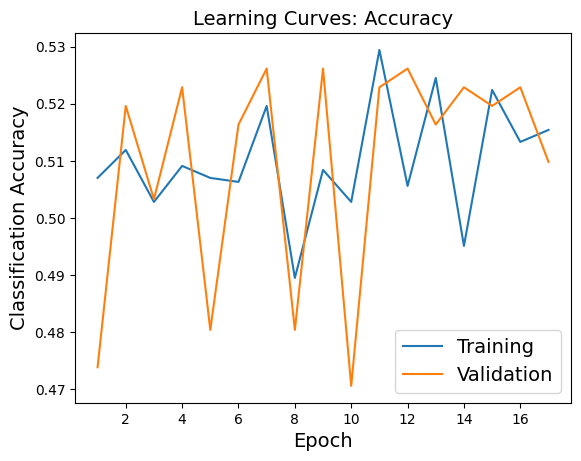

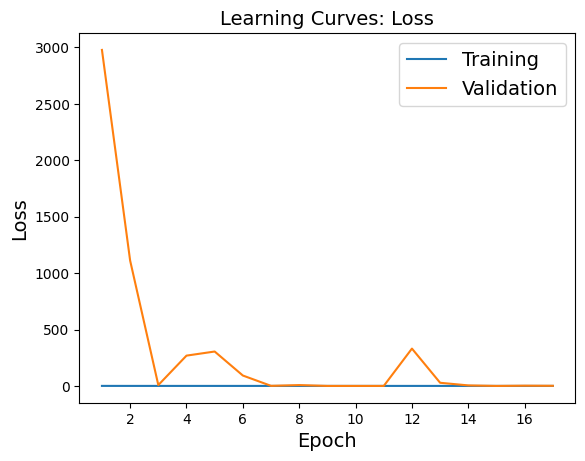

10/10 [==============================] - 2s 25ms/step


Accuracy Score: 0.5277
ROC-AUC Score: 0.4768




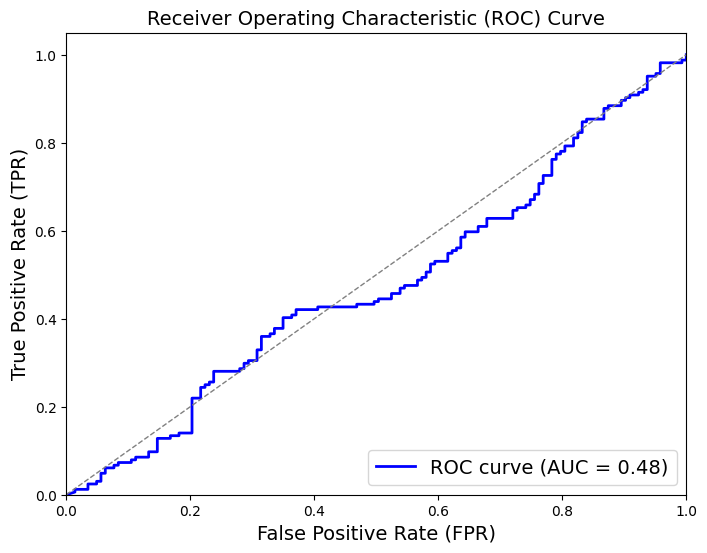

In [ ]:
#InceptionV3 - Model 3 (Unfreeze All the layers)

#clear the name counters
tf.keras.backend.clear_session()

# Load the pre-trained Inception v3 model as our "base model", excluding the top classification layers
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


# Unfreeze all layers in the base model
base_model_inception.trainable = True

# Print the status of trainable layers in the base model
for i, layer in enumerate(base_model_inception.layers):
    #print(i, layer.name, layer.trainable)
    print(i, f"{layer.name}: Trainable={layer.trainable}")

print('\n')

#Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical", input_shape=(299, 299, 3)),
    RandomRotation(0.2)
])


# Build the sequential model by adding the base model of Inception v3 and custom dense layers

model = Sequential()
model.add(data_augmentation)
model.add(base_model_inception)

#GlobalAveragePooling2D reduces the spatial dimensions to 1x1
#Do not need to add a flatten dense layer
model.add(GlobalAveragePooling2D())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu', kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu',kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#Output layer
model.add(Dense(1, activation='sigmoid', kernel_initializer="glorot_normal"))

# Print the model summary
model.summary()

print('\n')

# Compile the model

optimizer=keras.optimizers.Adam(learning_rate=0.001)

# binary cross-entropy loss function is used to measure the difference between
# the predicted probability and the true label for binary classification tasks.

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model


# Define the number of epochs
epochs = 50

batch_size=32


#Use early stopping callback to monitor the validation accuracy and stop training
#if the validation accuracy does not improve for "patience" number of epochs.
#Early stopping helps to prevent overfitting
# Define the patience for early stopping
patience = 10

# Create the EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)


history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(val_images, val_labels), callbacks=[early_stopping])

print('\n')

# Calculate the average training loss and accuracy
average_train_loss = sum(history.history['loss']) / len(history.history['loss'])
average_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])

# Print the final training loss and accuracy
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

print(f"Average Training Loss: {average_train_loss:.4f}")
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")

print('\n')

# Evaluate the model on the test set
print('Model Evaluation on test set:')
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print('\n')


# Plot the learning curves
plot_learning_curves(history)


# Obtain the accuracy & roc
accuracy_roc_inception(model, test_images, test_labels)


In [ ]:
# Create a copy of the model and assign it to Model_3_InceptionV3
Model_3_InceptionV3 = clone_model(model)
Model_3_InceptionV3.build()

# Save the model architecture to a JSON file
model_json = model.to_json()
with open("Model_3_InceptionV3_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("Model_3_InceptionV3_weights.h5")

print("Model 3 with InceptionV3 has been saved.")


Model 3 with InceptionV3 has been saved.


After adding a dense layer and some hyperparameter tuning, it doesn't improve at all.

## InceptionV3 - Model 4 (Unfreeze All the layers)
Hyperparameter Tuning: Learning rate = 0.0001


0 input_1: Trainable=True
1 conv2d: Trainable=True
2 batch_normalization: Trainable=True
3 activation: Trainable=True
4 conv2d_1: Trainable=True
5 batch_normalization_1: Trainable=True
6 activation_1: Trainable=True
7 conv2d_2: Trainable=True
8 batch_normalization_2: Trainable=True
9 activation_2: Trainable=True
10 max_pooling2d: Trainable=True
11 conv2d_3: Trainable=True
12 batch_normalization_3: Trainable=True
13 activation_3: Trainable=True
14 conv2d_4: Trainable=True
15 batch_normalization_4: Trainable=True
16 activation_4: Trainable=True
17 max_pooling2d_1: Trainable=True
18 conv2d_8: Trainable=True
19 batch_normalization_8: Trainable=True
20 activation_8: Trainable=True
21 conv2d_6: Trainable=True
22 conv2d_9: Trainable=True
23 batch_normalization_6: Trainable=True
24 batch_normalization_9: Trainable=True
25 activation_6: Trainable=True
26 activation_9: Trainable=True
27 average_pooling2d: Trainable=True
28 conv2d_5: Trainable=True
29 conv2d_7: Trainable=True
30 conv2d_10: Traina

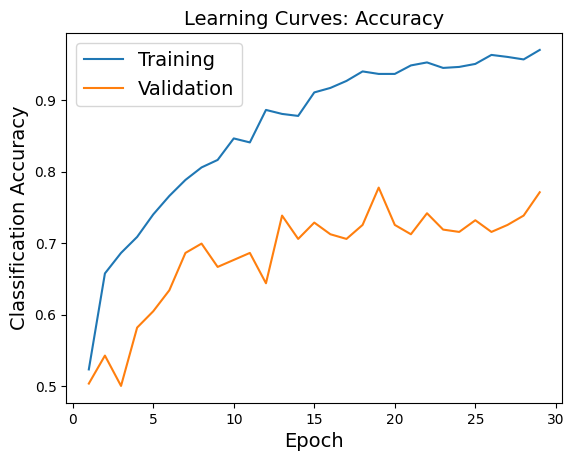

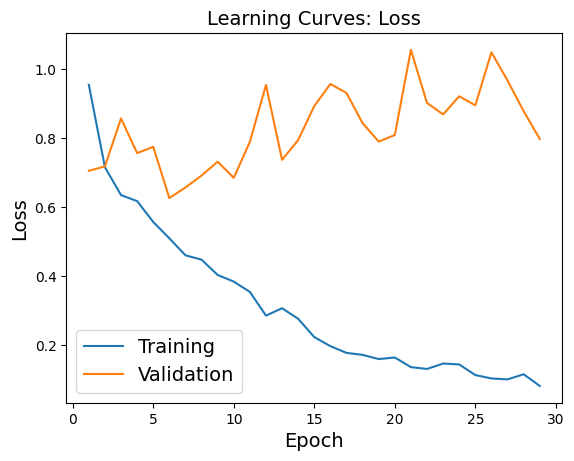

10/10 [==============================] - 1s 24ms/step


Accuracy Score: 0.7427
ROC-AUC Score: 0.8341




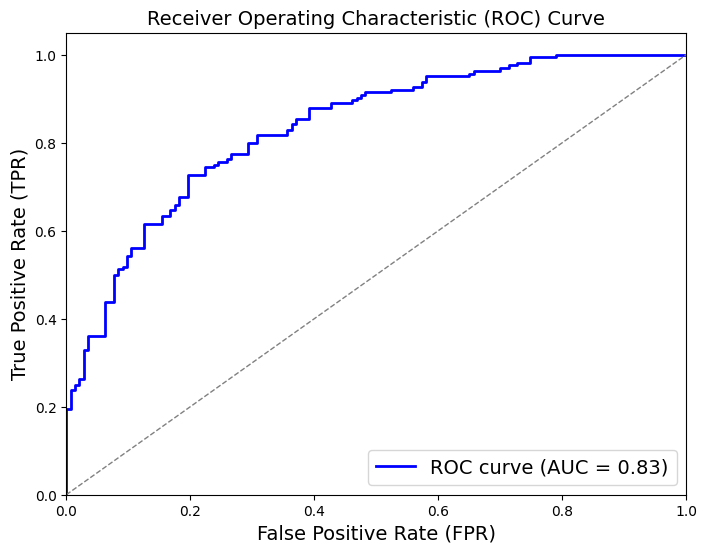

In [ ]:
#InceptionV3 - Model 4 (Unfreeze All the layers)

#clear the name counters
tf.keras.backend.clear_session()

# Load the pre-trained Inception v3 model as our "base model", excluding the top classification layers
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


# Unfreeze all layers in the base model
base_model_inception.trainable = True

# Print the status of trainable layers in the base model
for i, layer in enumerate(base_model_inception.layers):
    #print(i, layer.name, layer.trainable)
    print(i, f"{layer.name}: Trainable={layer.trainable}")

print('\n')

#Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical", input_shape=(299, 299, 3)),
    RandomRotation(0.2)
])


# Build the sequential model by adding the base model of Inception v3 and custom dense layers

model = Sequential()
model.add(data_augmentation)
model.add(base_model_inception)

#GlobalAveragePooling2D reduces the spatial dimensions to 1x1
#Do not need to add a flatten dense layer
model.add(GlobalAveragePooling2D())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu', kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu',kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#Output layer
model.add(Dense(1, activation='sigmoid', kernel_initializer="glorot_normal"))

# Print the model summary
model.summary()

print('\n')

# Compile the model

optimizer=keras.optimizers.Adam(learning_rate=0.0001)

# binary cross-entropy loss function is used to measure the difference between
# the predicted probability and the true label for binary classification tasks.

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model


# Define the number of epochs
epochs = 50

batch_size=32


#Use early stopping callback to monitor the validation accuracy and stop training
#if the validation accuracy does not improve for "patience" number of epochs.
#Early stopping helps to prevent overfitting
# Define the patience for early stopping
patience = 10

# Create the EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)


history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(val_images, val_labels), callbacks=[early_stopping])

print('\n')

# Calculate the average training loss and accuracy
average_train_loss = sum(history.history['loss']) / len(history.history['loss'])
average_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])

# Print the final training loss and accuracy
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

print(f"Average Training Loss: {average_train_loss:.4f}")
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")

print('\n')
# Evaluate the model on the test set
print('Model Evaluation on test set:')
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print('\n')


# Plot the learning curves
plot_learning_curves(history)


# Obtain the accuracy & roc
accuracy_roc_inception(model, test_images, test_labels)


In [ ]:
# Create a copy of the model and assign it to Model_4_InceptionV3
Model_4_InceptionV3 = clone_model(model)
Model_4_InceptionV3.build()

# Save the model architecture to a JSON file
model_json = model.to_json()
with open("Model_4_InceptionV3_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("Model_4_InceptionV3_weights.h5")

print("Model 4 with InceptionV3 has been saved.")

Model 4 with InceptionV3 has been saved.


In this Model 4, we have decreased the learning rate from 0.001 to 0.0001, this shows significant improvements in terms of training accuracy, accuracy score and the auc value. A lower value of learning rate can help to converge to a better optimum (global minimum point) in our cost function. But the model is overfitted, the difference between the training and testing accuracy is quite large. We need to further reduce the overfitting isses.

##InceptionV3 - Model 5 (Unfreeze All the layers)
> Use ImageDataGenerator on training set and remove the data augmentation part inside the custom sequential model to avoid over-augmentation and negatively impact the model's performance.
>

>Create an ImageDataGenerator with augmentation settings:

>image_data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


In [ ]:
#InceptionV3 - Model 5 (Unfreeze All the layers)

#clear the name counters
tf.keras.backend.clear_session()

# Load the pre-trained Inception v3 model as our "base model", excluding the top classification layers
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


# Unfreeze all layers in the base model
base_model_inception.trainable = True

# Print the status of trainable layers in the base model
for i, layer in enumerate(base_model_inception.layers):
    #print(i, layer.name, layer.trainable)
    print(i, f"{layer.name}: Trainable={layer.trainable}")

print('\n')



# Create an ImageDataGenerator with augmentation settings
image_data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)


#
train_data_generator = image_data_generator.flow(train_images, train_labels, batch_size=batch_size)


# Build the sequential model by adding the base model of Inception v3 and custom dense layers

model = Sequential()

model.add(base_model_inception)

#GlobalAveragePooling2D reduces the spatial dimensions to 1x1
#Do not need to add a flatten dense layer
model.add(GlobalAveragePooling2D())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu', kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu',kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#Output layer
model.add(Dense(1, activation='sigmoid', kernel_initializer="glorot_normal"))

# Print the model summary
model.summary()

print('\n')

# Compile the model

optimizer=keras.optimizers.Adam(learning_rate=0.0001)

# binary cross-entropy loss function is used to measure the difference between
# the predicted probability and the true label for binary classification tasks.

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model


# Define the number of epochs
epochs = 50

batch_size=32


#Use early stopping callback to monitor the validation accuracy and stop training
#if the validation accuracy does not improve for "patience" number of epochs.
#Early stopping helps to prevent overfitting
# Define the patience for early stopping
patience = 10

# Create the EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)


#history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    #validation_data=(val_images, val_labels), callbacks=[early_stopping])


history = model.fit(train_data_generator, epochs=epochs, validation_data=(val_images, val_labels), callbacks=[early_stopping])

print('\n')

# Calculate the average training loss and accuracy
average_train_loss = sum(history.history['loss']) / len(history.history['loss'])
average_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])

# Print the final training loss and accuracy
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

print(f"Average Training Loss: {average_train_loss:.4f}")
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")

print('\n')
# Evaluate the model on the test set
print('Model Evaluation on test set:')
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print('\n')





0 input_1: Trainable=True
1 conv2d: Trainable=True
2 batch_normalization: Trainable=True
3 activation: Trainable=True
4 conv2d_1: Trainable=True
5 batch_normalization_1: Trainable=True
6 activation_1: Trainable=True
7 conv2d_2: Trainable=True
8 batch_normalization_2: Trainable=True
9 activation_2: Trainable=True
10 max_pooling2d: Trainable=True
11 conv2d_3: Trainable=True
12 batch_normalization_3: Trainable=True
13 activation_3: Trainable=True
14 conv2d_4: Trainable=True
15 batch_normalization_4: Trainable=True
16 activation_4: Trainable=True
17 max_pooling2d_1: Trainable=True
18 conv2d_8: Trainable=True
19 batch_normalization_8: Trainable=True
20 activation_8: Trainable=True
21 conv2d_6: Trainable=True
22 conv2d_9: Trainable=True
23 batch_normalization_6: Trainable=True
24 batch_normalization_9: Trainable=True
25 activation_6: Trainable=True
26 activation_9: Trainable=True
27 average_pooling2d: Trainable=True
28 conv2d_5: Trainable=True
29 conv2d_7: Trainable=True
30 conv2d_10: Traina

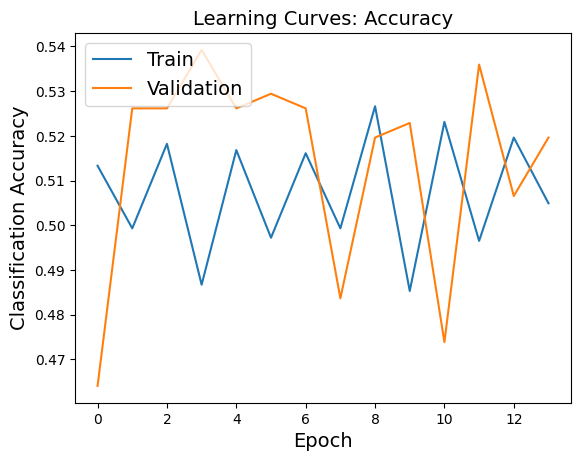

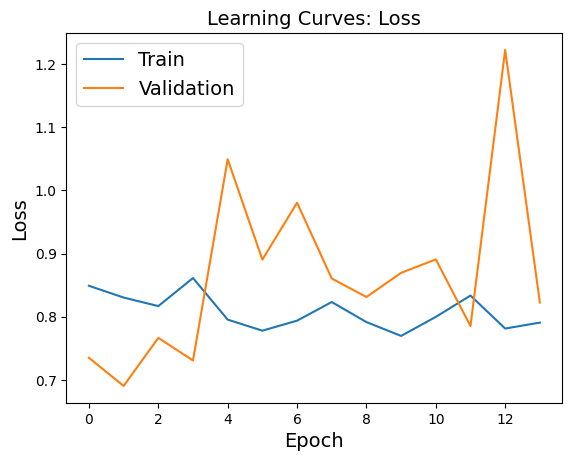

In [ ]:
# Plot the learning curves
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Learning Curves: Accuracy')
plt.ylabel('Classification Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curves: Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




10/10 [==============================] - 1s 24ms/step


Accuracy Score: 0.5440
ROC-AUC Score: 0.5525




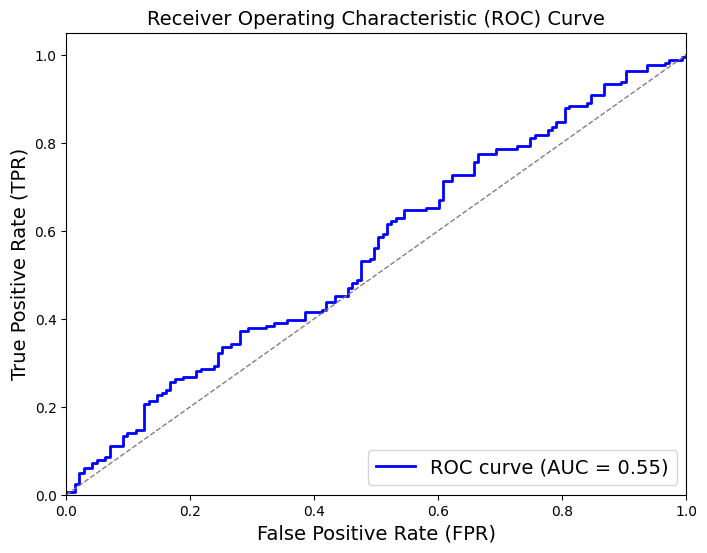

In [ ]:
# Obtain the accuracy & roc
accuracy_roc_inception(model, test_images, test_labels)

In [ ]:
# Create a copy of the model and assign it to Model_5_InceptionV3
Model_5_InceptionV3 = clone_model(model)

Model_5_InceptionV3.build()

# Save the model architecture to a JSON file
model_json = model.to_json()
with open("Model_5_InceptionV3_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("Model_5_InceptionV3_weights.h5")

print("Model 5 with InceptionV3 has been saved.")

Model 5 with InceptionV3 has been saved.


In Model 5, we try to reduce the overfitting issues by using ImageDataGenerator to increase the effective size of our dataset. Even though we adopt this Data Generator approach by obtaining more diverse training samples, the model performance does not improve at all. Indeed, it gets even worse than Model 4. All the metrics have decreased significantly. So, we decide to drop this approach in the next round of model tuning.

##InceptionV3 - Model 6 (Unfreeze All the layers)
Based on Model 4, since it is an overfit model, we try to performing hyperparameter tuning by adding L2 regularization, which penalizes large weights and encourages the model to use smaller weights, in order to prevent overfitting. Also, we add one Dropout layer in this round of model tuning.

0 input_1: Trainable=True
1 conv2d: Trainable=True
2 batch_normalization: Trainable=True
3 activation: Trainable=True
4 conv2d_1: Trainable=True
5 batch_normalization_1: Trainable=True
6 activation_1: Trainable=True
7 conv2d_2: Trainable=True
8 batch_normalization_2: Trainable=True
9 activation_2: Trainable=True
10 max_pooling2d: Trainable=True
11 conv2d_3: Trainable=True
12 batch_normalization_3: Trainable=True
13 activation_3: Trainable=True
14 conv2d_4: Trainable=True
15 batch_normalization_4: Trainable=True
16 activation_4: Trainable=True
17 max_pooling2d_1: Trainable=True
18 conv2d_8: Trainable=True
19 batch_normalization_8: Trainable=True
20 activation_8: Trainable=True
21 conv2d_6: Trainable=True
22 conv2d_9: Trainable=True
23 batch_normalization_6: Trainable=True
24 batch_normalization_9: Trainable=True
25 activation_6: Trainable=True
26 activation_9: Trainable=True
27 average_pooling2d: Trainable=True
28 conv2d_5: Trainable=True
29 conv2d_7: Trainable=True
30 conv2d_10: Traina

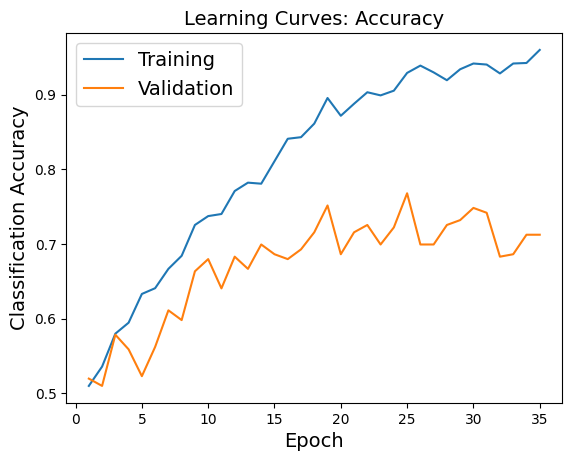

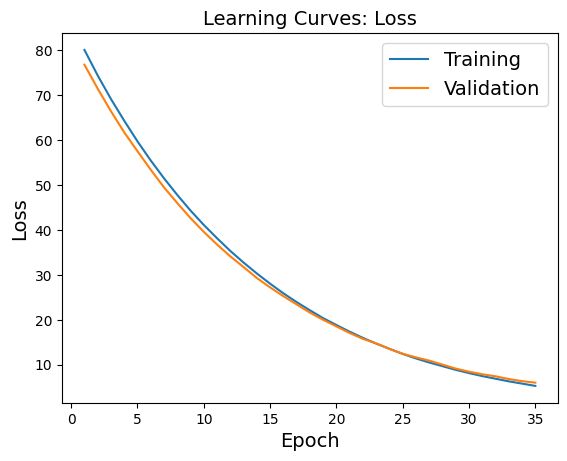

10/10 [==============================] - 2s 25ms/step


Accuracy Score: 0.7264
ROC-AUC Score: 0.8176




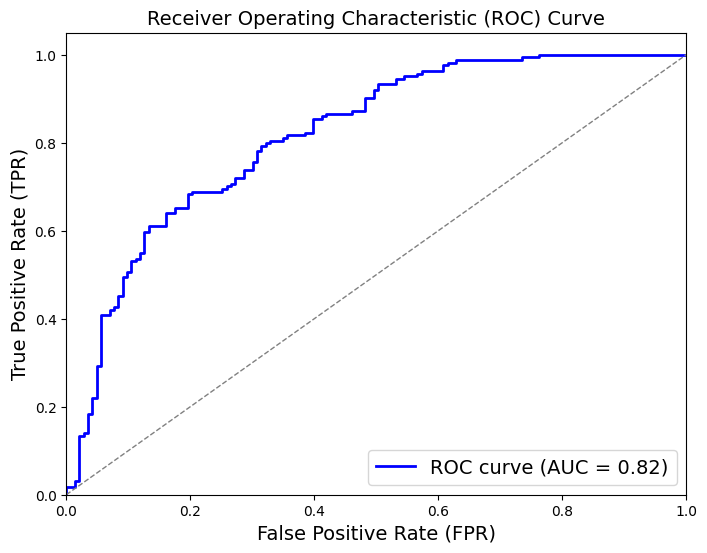

In [ ]:
#InceptionV3 - Model 6 (Unfreeze All the layers)

#clear the name counters
tf.keras.backend.clear_session()

# Load the pre-trained Inception v3 model as our "base model", excluding the top classification layers
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


# Unfreeze all layers in the base model
base_model_inception.trainable = True

# Print the status of trainable layers in the base model
for i, layer in enumerate(base_model_inception.layers):
    #print(i, layer.name, layer.trainable)
    print(i, f"{layer.name}: Trainable={layer.trainable}")

print('\n')

#Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical", input_shape=(299, 299, 3)),
    RandomRotation(0.2)
])


# Build the sequential model by adding the base model of Inception v3 and custom dense layers

model = Sequential()
model.add(data_augmentation)
model.add(base_model_inception)

#GlobalAveragePooling2D reduces the spatial dimensions to 1x1
#Do not need to add a flatten dense layer
model.add(GlobalAveragePooling2D())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.03)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu',kernel_initializer="he_normal", kernel_regularizer=l2(0.02)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Output layer
model.add(Dense(1, activation='sigmoid', kernel_initializer="glorot_normal"))

# Print the model summary
model.summary()

print('\n')

# Compile the model

optimizer=keras.optimizers.Adam(learning_rate=0.0001)

# binary cross-entropy loss function is used to measure the difference between
# the predicted probability and the true label for binary classification tasks.

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model


# Define the number of epochs
epochs = 50

batch_size=32


#Use early stopping callback to monitor the validation accuracy and stop training
#if the validation accuracy does not improve for "patience" number of epochs.
#Early stopping helps to prevent overfitting
# Define the patience for early stopping
patience = 10

# Create the EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)


history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(val_images, val_labels), callbacks=[early_stopping])

print('\n')

# Calculate the average training loss and accuracy
average_train_loss = sum(history.history['loss']) / len(history.history['loss'])
average_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])

# Print the final training loss and accuracy
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

print(f"Average Training Loss: {average_train_loss:.4f}")
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")

print('\n')
# Evaluate the model on the test set
print('Model Evaluation on test set:')
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print('\n')


# Plot the learning curves
plot_learning_curves(history)


# Obtain the accuracy & roc
accuracy_roc_inception(model, test_images, test_labels)


In [ ]:
# Create a copy of the model and assign it to Model_6_InceptionV3
Model_6_InceptionV3 = clone_model(model)

Model_6_InceptionV3.build()

# Save the model architecture to a JSON file
model_json = model.to_json()
with open("Model_6_InceptionV3_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("Model_6_InceptionV3_weights.h5")

print("Model 6 with InceptionV3 has been saved.")

Model 6 with InceptionV3 has been saved.


In this round of our model tuning, we use the L2 regularization that  involves adding a penalty term to the loss (cost) function during our training by discouraging large weights in the model. We increase the strength of L2 regularization from 0.01 to 0.02 and 0.03 in 2 different dense layers. It helps to prevent overfitting by reducing the complexity of the model.

We also add an extra layer of Dropout and increase the dropout rate up to 50% in those 2 dropout layers.
Dropout is the concept of temporarily and randomly deactivates a proportion of neurons in a layer during training, which helps to prevent overfitting by introducing noise and promoting more robust learning.

In this Model 6, by looking at the cost function, both the training and validation curves merges at the end of the iterations, which indicates that the model is learning from the training data and generalizing well to the validation data without significantly overfitting compared to Model 4. In the case of Model 4, both curves in the cost function do not converge at the end.

The AUC value is 0.82 of which it is a good performance in distinguishing between the two classes, with an 82% probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

By having a higher training accuracy (96%) and accuracy score (73%) along with a higher AUC value (0.82). Model 6 is the best performance that we choose in the case of adopting the Inception v3 pre-trained model.

##InceptionV3 - Model 7 (Unfreeze the layers up to Mixed 4)
                        
> Unfreezing the top 133 layers

>Based on Model 6, we try to unfreeze some of the top layers in Inception v3. We just reuse the pre-trained layers up to Mixed 4, which is up to 133 layers. We are using approximately 40% of the total layers(311 layers) from the Inception v3.

Number of layers in Inception v3 base model: 133


0 input_1: Trainable=True
1 conv2d: Trainable=True
2 batch_normalization: Trainable=True
3 activation: Trainable=True
4 conv2d_1: Trainable=True
5 batch_normalization_1: Trainable=True
6 activation_1: Trainable=True
7 conv2d_2: Trainable=True
8 batch_normalization_2: Trainable=True
9 activation_2: Trainable=True
10 max_pooling2d: Trainable=True
11 conv2d_3: Trainable=True
12 batch_normalization_3: Trainable=True
13 activation_3: Trainable=True
14 conv2d_4: Trainable=True
15 batch_normalization_4: Trainable=True
16 activation_4: Trainable=True
17 max_pooling2d_1: Trainable=True
18 conv2d_8: Trainable=True
19 batch_normalization_8: Trainable=True
20 activation_8: Trainable=True
21 conv2d_6: Trainable=True
22 conv2d_9: Trainable=True
23 batch_normalization_6: Trainable=True
24 batch_normalization_9: Trainable=True
25 activation_6: Trainable=True
26 activation_9: Trainable=True
27 average_pooling2d: Trainable=True
28 conv2d_5: Trainable=Tr

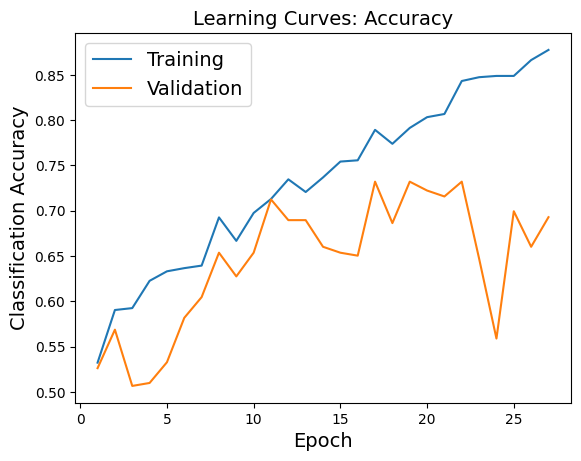

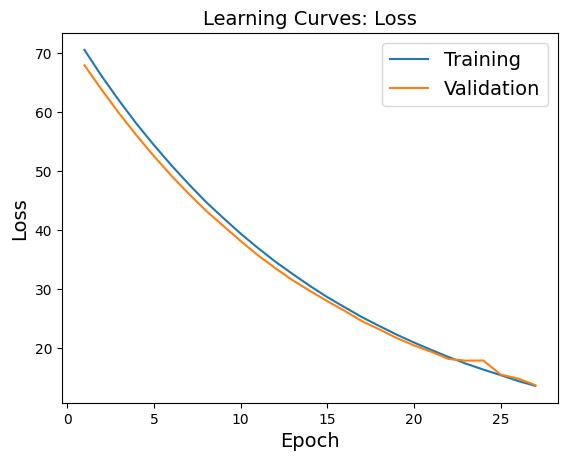

10/10 [==============================] - 1s 30ms/step


Accuracy Score: 0.7166
ROC-AUC Score: 0.7609




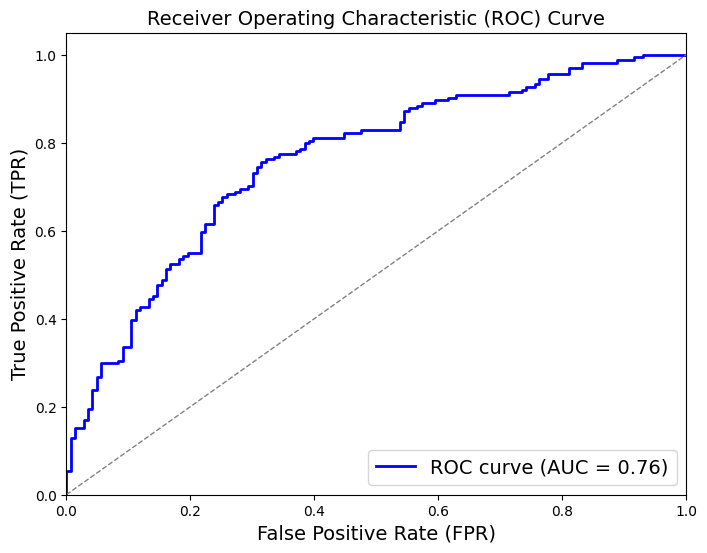

In [ ]:
#InceptionV3 - Model 7 (Unfreeze the layers up to Mixed 4)
#Unfreezing the top 133 layers

# clear the name counters
tf.keras.backend.clear_session()

# Load the pre-trained Inception v3 model as our "base model", excluding the top classification layers
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Find the index of the "Mixed4" layer in the base model
mixed4_index = None
for i, layer in enumerate(base_model_inception.layers):
    if "mixed4" in layer.name.lower():
        mixed4_index = i
        break

# Check if "Mixed4" layer is found
if mixed4_index is not None:
    # Create a new model using the layers up to and including "Mixed4"
    base_model_inception = tf.keras.Model(inputs=base_model_inception.input,
                                          outputs=base_model_inception.layers[mixed4_index].output)
else:
    raise ValueError("Layer 'Mixed4' not found in the base model.")



# Get the number of layers in this base model
num_layers = len(base_model_inception.layers)
print("Number of layers in Inception v3 base model:", num_layers)

print('\n')

# Print the status of trainable layers in the base model
for i, layer in enumerate(base_model_inception.layers):
    print(i, f"{layer.name}: Trainable={layer.trainable}")

print('\n')

#Define the data augmentation layers
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical", input_shape=(299, 299, 3)),
    RandomRotation(0.2)
])


# Build the sequential model by adding the base model of Inception v3 and custom dense layers

model = Sequential()
model.add(data_augmentation)
model.add(base_model_inception)

#GlobalAveragePooling2D reduces the spatial dimensions to 1x1
#Do not need to add a flatten dense layer
model.add(GlobalAveragePooling2D())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.03)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu',kernel_initializer="he_normal", kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Output layer
model.add(Dense(1, activation='sigmoid', kernel_initializer="glorot_normal"))

# Print the model summary
model.summary()

print('\n')

# Compile the model

optimizer=keras.optimizers.Adam(learning_rate=0.0001)

# binary cross-entropy loss function is used to measure the difference between
# the predicted probability and the true label for binary classification tasks.

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model


# Define the number of epochs
epochs = 50

batch_size=32


#Use early stopping callback to monitor the validation accuracy and stop training
#if the validation accuracy does not improve for "patience" number of epochs.
#Early stopping helps to prevent overfitting
# Define the patience for early stopping
patience = 10

# Create the EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)


history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs,
                    validation_data=(val_images, val_labels), callbacks=[early_stopping])

print('\n')

# Calculate the average training loss and accuracy
average_train_loss = sum(history.history['loss']) / len(history.history['loss'])
average_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])

# Print the final training loss and accuracy
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]

print(f"Average Training Loss: {average_train_loss:.4f}")
print(f"Average Training Accuracy: {average_train_accuracy:.4f}")

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")

print('\n')
# Evaluate the model on the test set
print('Model Evaluation on test set:')
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print('\n')


# Plot the learning curves
plot_learning_curves(history)


# Obtain the accuracy & roc
accuracy_roc_inception(model, test_images, test_labels)


In [ ]:
# Create a copy of the model and assign it to Model_7_InceptionV3
Model_7_InceptionV3 = clone_model(model)

Model_7_InceptionV3.build()

# Save the model architecture to a JSON file
model_json = model.to_json()
with open("Model_7_InceptionV3_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("Model_7_InceptionV3_weights.h5")

print("Model 7 with InceptionV3 has been saved.")

Model 7 with InceptionV3 has been saved.


By unfreezing the top 133 layers in Model 7, the performance does not improve at all compared to the previous Model 6. There is a decrease in terms of AUC value. It drops to 76% in the case of Model 7, whereas Model 6 has the AUC value of 82%. Also, Model 7 is still an overfit model.



##Model Comparison (Inception_V3)

After fine-tuning our models with the adoption of GoogLeNet Inception V3, we choose Model 6 as the best model among them. After introducing L2 regularization, adding an extra dropout layer and increasing the dropout rates to 50% in both layers, this significantly helps the curves of both training and validation converge at the end. This means that the model has learned to generalize well on the validation data and does not overfit to the training data. Model 6 has signifcantly improved compared to Model 4.

Moreover, the AUC of 0.82 is considered to be a good performance for a binary classification model, suggesting that the model has achieved a significant degree of separation between the positive and negative classes.

#**5.2 ResNet-50**



Test model with various blocks frozen/unfrozen

94668760/94668760 [==============================] - 1s 0us/step
Epoch 1/20
39/39 [==============================] - 15s 65ms/step - loss: 2.0906 - accuracy: 0.4779 - val_loss: 1.6904 - val_accuracy: 0.5417
Epoch 2/20
39/39 [==============================] - 1s 24ms/step - loss: 1.7458 - accuracy: 0.4984 - val_loss: 1.6065 - val_accuracy: 0.5294
Epoch 3/20
39/39 [==============================] - 1s 24ms/step - loss: 1.6135 - accuracy: 0.5196 - val_loss: 1.5640 - val_accuracy: 0.5221
Epoch 4/20
39/39 [==============================] - 1s 24ms/step - loss: 1.5119 - accuracy: 0.5417 - val_loss: 1.5386 - val_accuracy: 0.5123
Epoch 5/20
39/39 [==============================] - 1s 24ms/step - loss: 1.4376 - accuracy: 0.5490 - val_loss: 1.5257 - val_accuracy: 0.5147
Epoch 6/20
39/39 [==============================] - 1s 24ms/step - loss: 1.3681 - accuracy: 0.5613 - val_loss: 1.5446 - val_accuracy: 0.5294
Epoch 7/20
39/39 [==============================] - 1s 24ms/step - loss: 1.3094 - accura

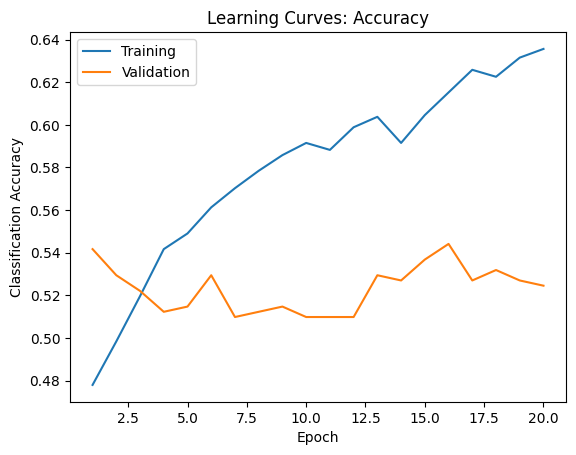

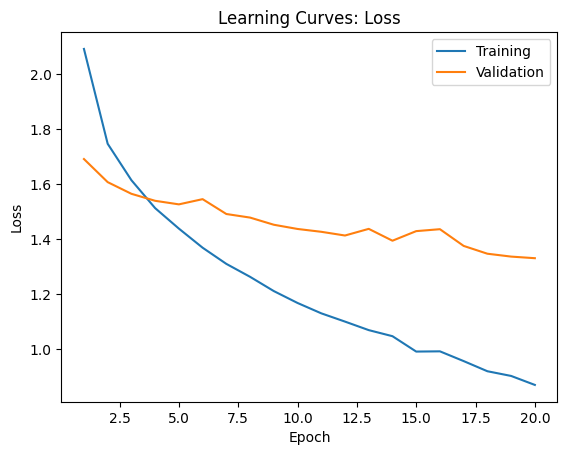

In [ ]:
# Create ResNet50V2 model

def create_model():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #Load resNet50V2 model minus top layer

    # Freeze all layers
    for layer in resnet_model.layers:
        layer.trainable=False

    model = models.Sequential([ # Add new layers to sequential model
    resnet_model,
    layers.GlobalMaxPooling2D(), # add pooling layer
])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    return model

model = create_model()
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val)) # fit model

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)

Epoch 1/20
39/39 [==============================] - 39s 124ms/step - loss: 2.0914 - accuracy: 0.5458 - val_loss: 2.1234 - val_accuracy: 0.5637
Epoch 2/20
39/39 [==============================] - 2s 58ms/step - loss: 0.3624 - accuracy: 0.9052 - val_loss: 1.7044 - val_accuracy: 0.6152
Epoch 3/20
39/39 [==============================] - 2s 55ms/step - loss: 0.1747 - accuracy: 0.9493 - val_loss: 1.6001 - val_accuracy: 0.5931
Epoch 4/20
39/39 [==============================] - 2s 58ms/step - loss: 0.0606 - accuracy: 0.9804 - val_loss: 2.1391 - val_accuracy: 0.6275
Epoch 5/20
39/39 [==============================] - 2s 55ms/step - loss: 0.0221 - accuracy: 0.9926 - val_loss: 1.9975 - val_accuracy: 0.6176
Epoch 6/20
39/39 [==============================] - 2s 57ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 1.9065 - val_accuracy: 0.6324
Epoch 7/20
39/39 [==============================] - 2s 55ms/step - loss: 0.0252 - accuracy: 0.9943 - val_loss: 2.4564 - val_accuracy: 0.6078
Epoch 8/20


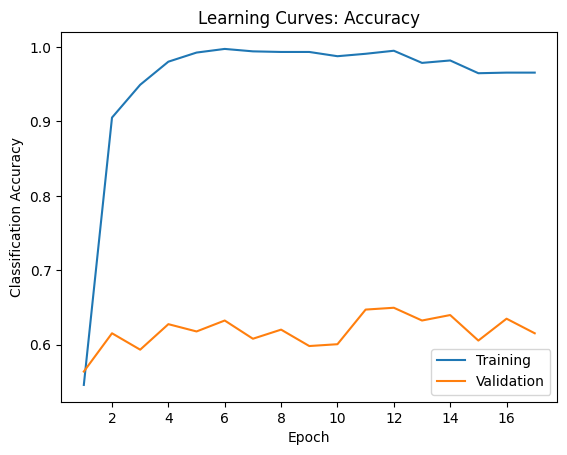

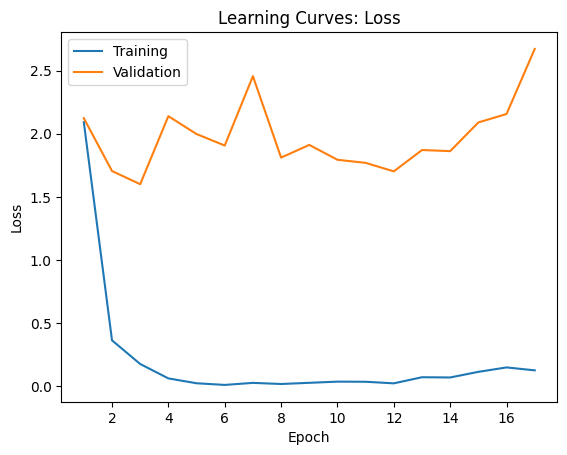

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6186
ROC-AUC Score: 0.6824




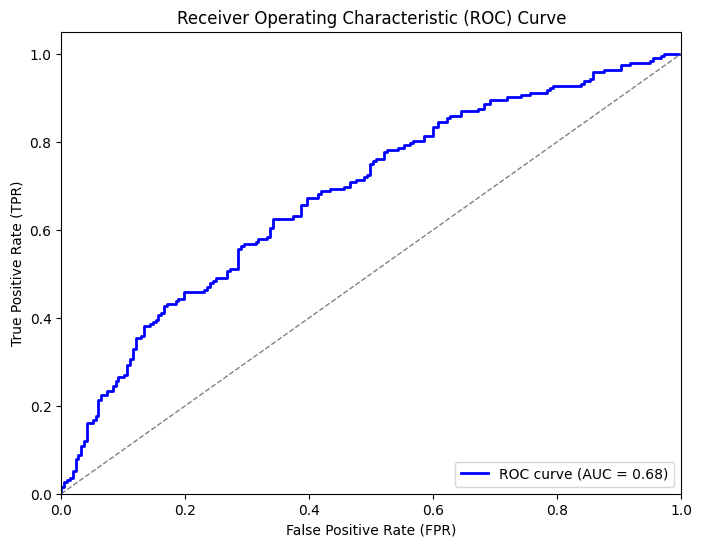

In [ ]:
# Test model with all layers unfrozen

def create_model_unfrozen_all():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #Load resNet50V2 model minus top layer

    # Unfreeze all layers
    for layer in resnet_model.layers:
      layer.trainable = True

    model = models.Sequential([ # Add new layers to sequential model
    resnet_model,
    layers.GlobalMaxPooling2D(), # add pooling layer
])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    return model

model = create_model_unfrozen_all() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Epoch 1/20
39/39 [==============================] - 11s 63ms/step - loss: 2.0486 - accuracy: 0.5752 - val_loss: 1.5123 - val_accuracy: 0.5711
Epoch 2/20
39/39 [==============================] - 1s 30ms/step - loss: 0.1708 - accuracy: 0.9420 - val_loss: 3.1833 - val_accuracy: 0.5123
Epoch 3/20
39/39 [==============================] - 1s 33ms/step - loss: 0.0381 - accuracy: 0.9853 - val_loss: 2.1007 - val_accuracy: 0.5956
Epoch 4/20
39/39 [==============================] - 1s 33ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 1.7501 - val_accuracy: 0.6176
Epoch 5/20
39/39 [==============================] - 1s 33ms/step - loss: 0.0035 - accuracy: 0.9984 - val_loss: 1.7442 - val_accuracy: 0.6275
Epoch 6/20
39/39 [==============================] - 1s 34ms/step - loss: 8.9461e-04 - accuracy: 1.0000 - val_loss: 1.6976 - val_accuracy: 0.6299
Epoch 7/20
39/39 [==============================] - 1s 31ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7425 - val_accuracy: 0.6299
Epoch 8/

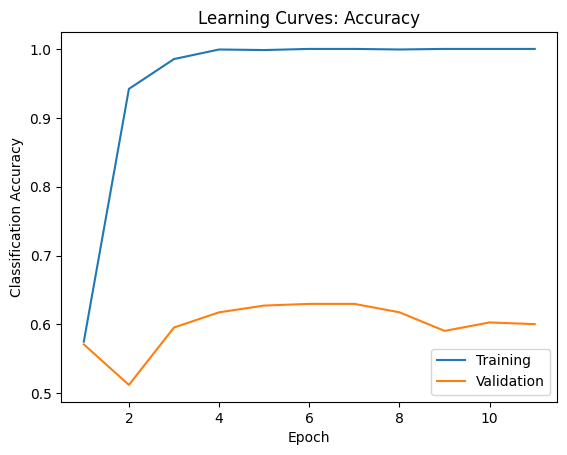

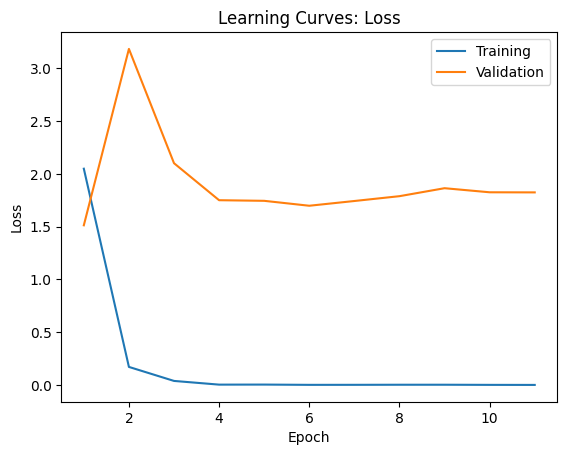

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6430
ROC-AUC Score: 0.6852




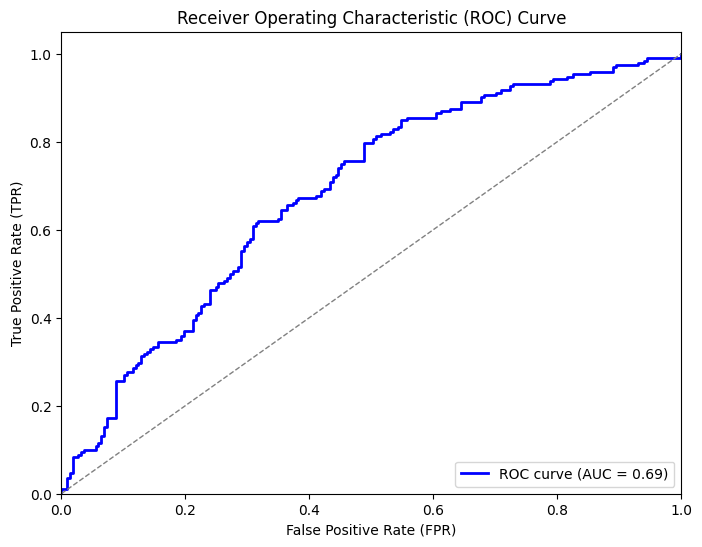

In [ ]:
# Test model with last layer unfrozen

def create_model_unfrozen_last():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #Load resNet50V2 model minus top layer

    # Unfreeze last layer
    for layer in resnet_model.layers:
      if 'conv5' in layer.name:
        layer.trainable = True
      else:
        layer.trainable = False

    model = models.Sequential([ # Add new layers to sequential model
    resnet_model,
    layers.GlobalMaxPooling2D(), # add pooling layer
])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    return model

model = create_model_unfrozen_last() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Epoch 1/20
39/39 [==============================] - 33s 89ms/step - loss: 2.0090 - accuracy: 0.5866 - val_loss: 3.9375 - val_accuracy: 0.4902
Epoch 2/20
39/39 [==============================] - 2s 58ms/step - loss: 0.3318 - accuracy: 0.9044 - val_loss: 4.0722 - val_accuracy: 0.5270
Epoch 3/20
39/39 [==============================] - 2s 58ms/step - loss: 0.0917 - accuracy: 0.9665 - val_loss: 1.8854 - val_accuracy: 0.5956
Epoch 4/20
39/39 [==============================] - 2s 59ms/step - loss: 0.0487 - accuracy: 0.9804 - val_loss: 1.6251 - val_accuracy: 0.6250
Epoch 5/20
39/39 [==============================] - 2s 59ms/step - loss: 0.0297 - accuracy: 0.9877 - val_loss: 1.8548 - val_accuracy: 0.6422
Epoch 6/20
39/39 [==============================] - 2s 55ms/step - loss: 0.0244 - accuracy: 0.9910 - val_loss: 1.7737 - val_accuracy: 0.6299
Epoch 7/20
39/39 [==============================] - 2s 55ms/step - loss: 0.0174 - accuracy: 0.9984 - val_loss: 1.7180 - val_accuracy: 0.6348
Epoch 8/20
3

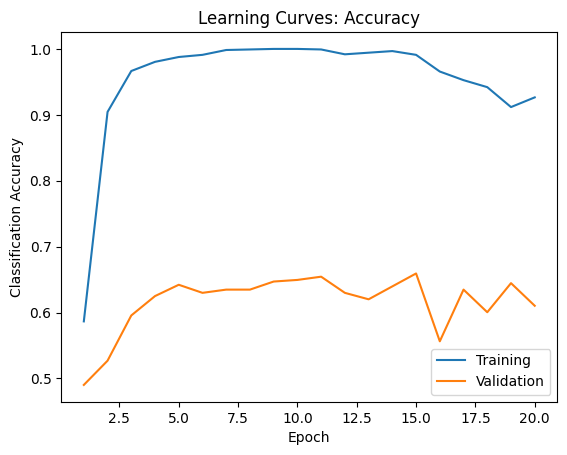

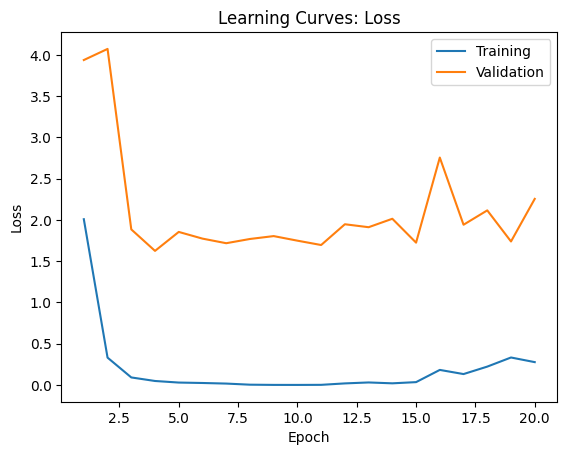

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6210
ROC-AUC Score: 0.6790




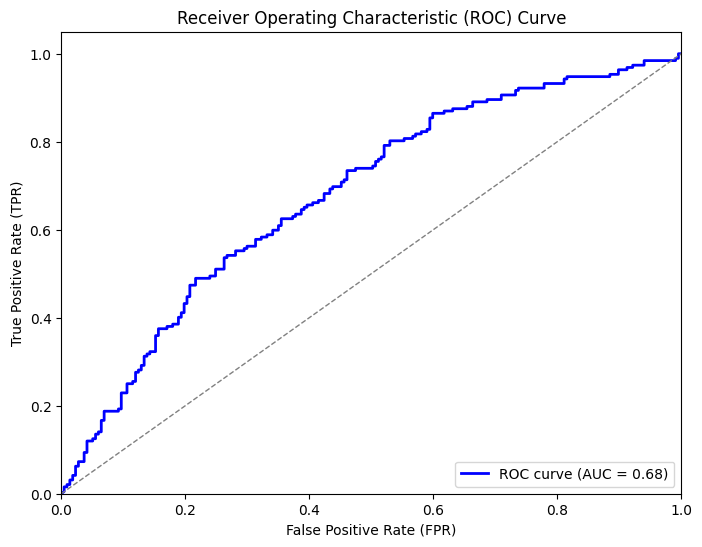

In [ ]:
# Test model with last two layers unfrozen

def create_model_unfrozen_last_2():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #Load resNet50V2 model minus top layer

    # Unfreeze last two layers
    for layer in resnet_model.layers:
      if 'conv4' or 'conv5' in layer.name:
        layer.trainable = True
      else:
        layer.trainable = False

    model = models.Sequential([ # Add new layers to sequential model
    resnet_model,
    layers.GlobalMaxPooling2D(), # add pooling layer
])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    return model

model = create_model_unfrozen_last_2() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Epoch 1/20
39/39 [==============================] - 12s 82ms/step - loss: 2.2970 - accuracy: 0.5694 - val_loss: 1.4529 - val_accuracy: 0.6029
Epoch 2/20
39/39 [==============================] - 2s 49ms/step - loss: 0.3207 - accuracy: 0.9150 - val_loss: 1.5111 - val_accuracy: 0.5809
Epoch 3/20
39/39 [==============================] - 2s 48ms/step - loss: 0.0294 - accuracy: 0.9894 - val_loss: 2.0747 - val_accuracy: 0.5784
Epoch 4/20
39/39 [==============================] - 2s 49ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 1.9189 - val_accuracy: 0.6029
Epoch 5/20
39/39 [==============================] - 2s 51ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.6638 - val_accuracy: 0.6250
Epoch 6/20
39/39 [==============================] - 2s 51ms/step - loss: 9.7032e-04 - accuracy: 1.0000 - val_loss: 1.6480 - val_accuracy: 0.6397
Epoch 7/20
39/39 [==============================] - 2s 48ms/step - loss: 7.5130e-04 - accuracy: 1.0000 - val_loss: 1.7050 - val_accuracy: 0.6176
Epoc

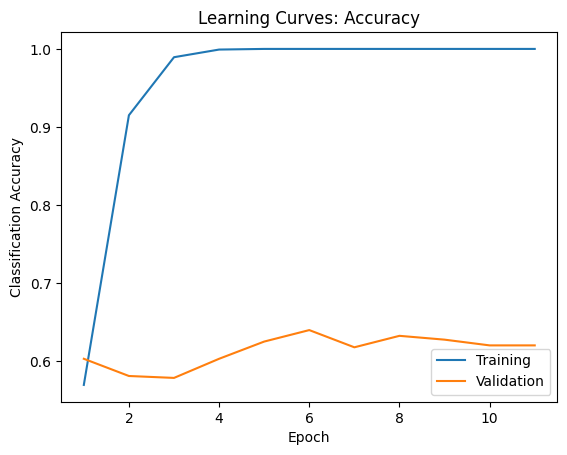

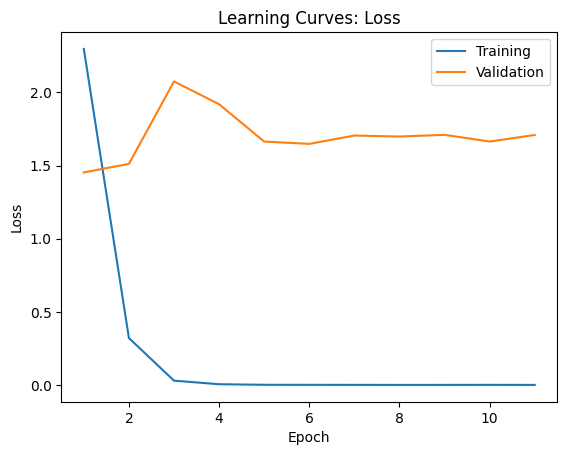

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6601
ROC-AUC Score: 0.7071




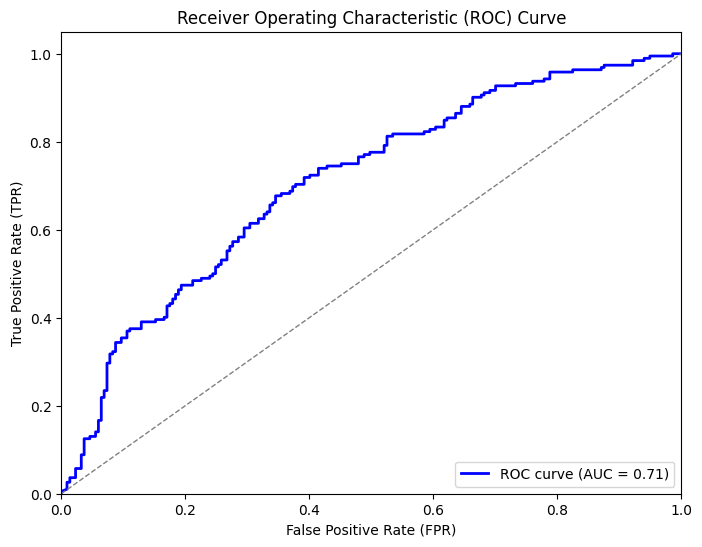

In [ ]:
# Test model with first two layers and last layer unfrozen, middle layers frozen

def create_model_ice_cream_sandwich():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #Load resNet50V2 model minus top layer

     #Unfreeze first two and last layers
    for layer in resnet_model.layers:
      if 'conv1' in layer.name  or 'conv5' in layer.name:
        layer.trainable = True
      else:
        layer.trainable = False

    model = models.Sequential([ # Add new layers to sequential model
    resnet_model,
    layers.GlobalMaxPooling2D(), # add pooling layer
])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    return model

model = create_model_ice_cream_sandwich() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Add extra dense layers.

Epoch 1/20
39/39 [==============================] - 14s 88ms/step - loss: 1.2261 - accuracy: 0.5629 - val_loss: 0.9518 - val_accuracy: 0.5637
Epoch 2/20
39/39 [==============================] - 2s 52ms/step - loss: 0.2476 - accuracy: 0.9003 - val_loss: 0.9721 - val_accuracy: 0.5858
Epoch 3/20
39/39 [==============================] - 2s 49ms/step - loss: 0.0324 - accuracy: 0.9935 - val_loss: 0.9435 - val_accuracy: 0.5858
Epoch 4/20
39/39 [==============================] - 2s 52ms/step - loss: 0.0163 - accuracy: 0.9984 - val_loss: 0.9433 - val_accuracy: 0.6054
Epoch 5/20
39/39 [==============================] - 2s 49ms/step - loss: 0.0061 - accuracy: 0.9992 - val_loss: 1.0310 - val_accuracy: 0.5858
Epoch 6/20
39/39 [==============================] - 2s 52ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 1.0874 - val_accuracy: 0.6078
Epoch 7/20
39/39 [==============================] - 2s 52ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.0533 - val_accuracy: 0.6299
Epoch 8/20
3

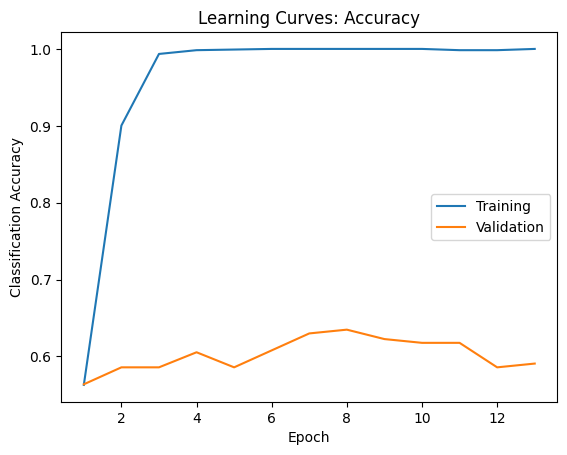

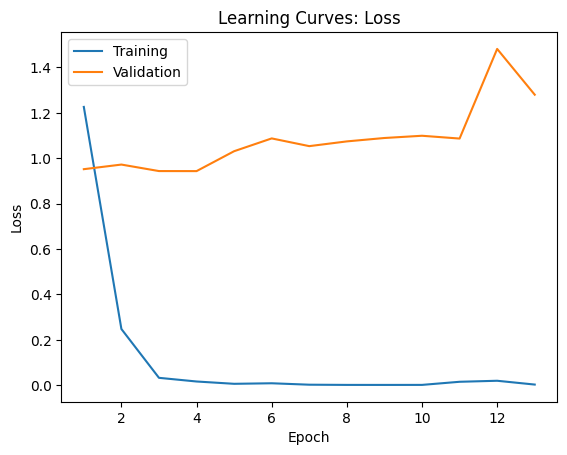

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6284
ROC-AUC Score: 0.6542




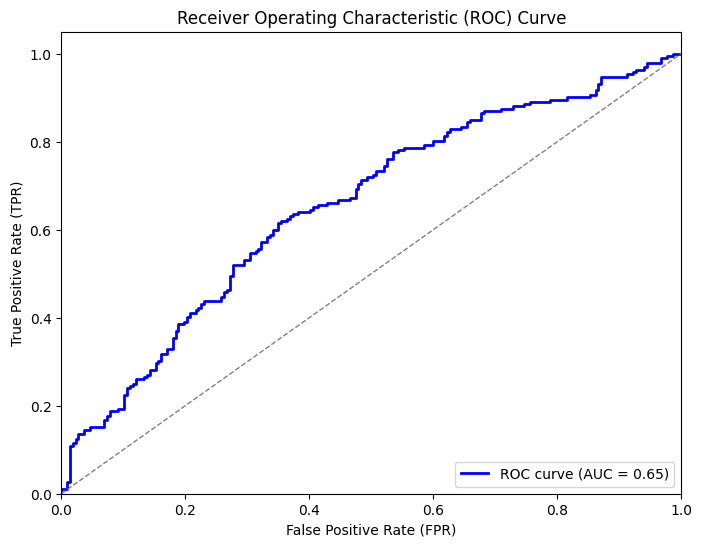

In [ ]:
# Add two extra dense layers

def create_model_layers():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
     if 'conv1' in layer.name  or 'conv5' in layer.name:
        layer.trainable = True
     else:
        layer.trainable = False

    model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation = 'relu'), #add dense layers
    layers.Dense(256, activation = 'relu'),

])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_layers() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Apply Data Augmentation

In [ ]:
# Augment Data

def augment_data(images, labels):
    augmented_images = [] # Create arrays for augmented images
    augmented_labels = []

    for i in range(len(images)):
        image = images[i]
        label = labels[i]

        augmented_image = apply_augmentation(image)

        # Append augmented data to the lists
        augmented_images.append(augmented_image)
        augmented_labels.append(label)

    return np.array(augmented_images), np.array(augmented_labels)

def apply_augmentation(image):
    # Random rotation
    angle = np.random.randint(-15, 15)
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    image = cv2.warpAffine(image, rotation_matrix, (width, height))

  # High-Pass Filtering
    sigma = 1.0
    image = high_pass_filter(image, sigma)

  # Adjust contrast
    contrast_factor = 0.5 + np.random.rand()
    image = adjust_contrast(image, contrast_factor)

    return image

# High pass filter to highlight areas with rapidly changing frequencies (i.e. - very sharp edges)

from scipy.ndimage import gaussian_filter
def high_pass_filter(image, sigma):

    blurred_image = gaussian_filter(image, sigma=sigma)  # Apply Gaussian smoothing to the image

    high_pass_image = image - blurred_image # Subtract the blurred image from the original to get the high-frequency components

    enhanced_image = image + high_pass_image # Add the high-frequency components back to the original image to enhance them

    enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8) # Clip the pixel values to ensure they stay within the valid range (0 to 255)

    return enhanced_image

# Function to adjust contrast

def adjust_contrast(image, contrast_factor):

    assert 0.0 <= contrast_factor <= 2.0, "Contrast factor must be between 0.0 and 2.0" # Ensure the contrast factor is within a valid range

    float_image = image.astype(np.float32) / 255.0 # Convert the image to floating point representation

    adjusted_image = np.clip(float_image * contrast_factor, 0.0, 1.0) # Adjust the contrast by multiplying the pixel values by the contrast factor

    adjusted_image = (adjusted_image * 255.0).astype(np.uint8) # Convert the image back to 8-bit unsigned integer representation (0-255)

    return adjusted_image


# Apply data augmentation to the training set

augmented_train_images, augmented_train_labels = augment_data(X_train, y_train)

# Add augmented data to original data to increase data size and variability

augmented_train_images = np.concatenate([X_train, augmented_train_images])
augmented_train_labels = np.concatenate([y_train, augmented_train_labels])



Epoch 1/20
77/77 [==============================] - 15s 78ms/step - loss: 0.9704 - accuracy: 0.5437 - val_loss: 0.7491 - val_accuracy: 0.6225
Epoch 2/20
77/77 [==============================] - 4s 46ms/step - loss: 0.4365 - accuracy: 0.7733 - val_loss: 0.8441 - val_accuracy: 0.6103
Epoch 3/20
77/77 [==============================] - 4s 48ms/step - loss: 0.2805 - accuracy: 0.8382 - val_loss: 0.8454 - val_accuracy: 0.6299
Epoch 4/20
77/77 [==============================] - 4s 46ms/step - loss: 0.2270 - accuracy: 0.8627 - val_loss: 0.9584 - val_accuracy: 0.6225
Epoch 5/20
77/77 [==============================] - 4s 48ms/step - loss: 0.2159 - accuracy: 0.8558 - val_loss: 0.9835 - val_accuracy: 0.6397
Epoch 6/20
77/77 [==============================] - 4s 47ms/step - loss: 0.2072 - accuracy: 0.8636 - val_loss: 1.0507 - val_accuracy: 0.6201
Epoch 7/20
77/77 [==============================] - 4s 48ms/step - loss: 0.2112 - accuracy: 0.8558 - val_loss: 1.1936 - val_accuracy: 0.6471
Epoch 8/20
7

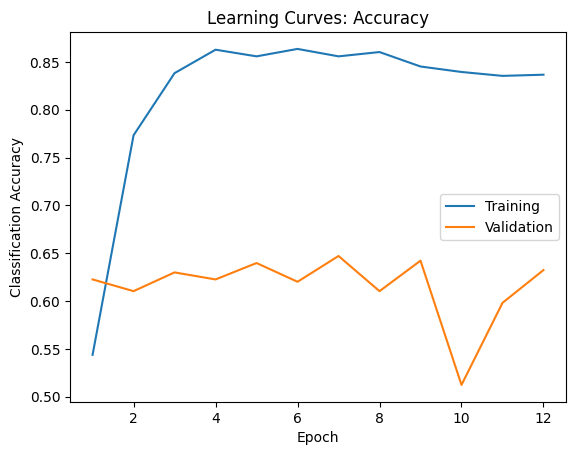

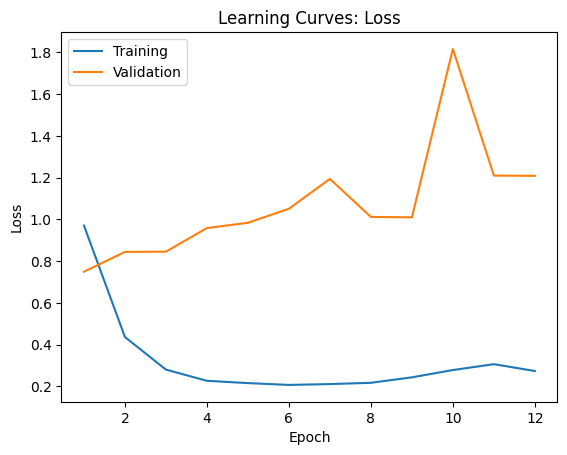

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6601
ROC-AUC Score: 0.7186




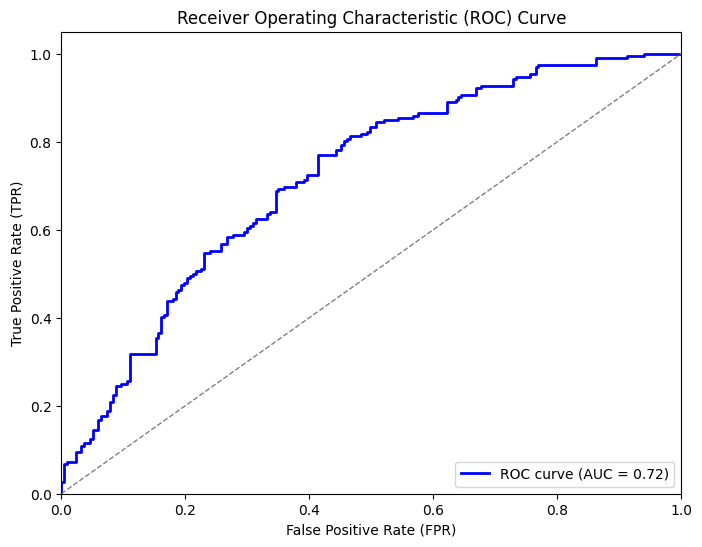

In [ ]:
# Test Model with Augmented data

def create_model_augmented():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
     if 'conv1' in layer.name  or 'conv5' in layer.name:
        layer.trainable = True
     else:
        layer.trainable = False

    model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation = 'relu'), #add dense layers
    layers.Dense(256, activation = 'relu'),


])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_augmented() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(augmented_train_images, augmented_train_labels, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Hyperparameter tuning - learning rate,weight regularization, number of units in dense layers.

Epoch 1/20
77/77 [==============================] - 15s 65ms/step - loss: 1.0844 - accuracy: 0.5380 - val_loss: 1.0549 - val_accuracy: 0.5637
Epoch 2/20
77/77 [==============================] - 4s 48ms/step - loss: 0.5406 - accuracy: 0.7059 - val_loss: 0.9499 - val_accuracy: 0.5686
Epoch 3/20
77/77 [==============================] - 4s 46ms/step - loss: 0.4128 - accuracy: 0.7823 - val_loss: 0.9784 - val_accuracy: 0.5613
Epoch 4/20
77/77 [==============================] - 4s 48ms/step - loss: 0.3065 - accuracy: 0.8407 - val_loss: 0.9980 - val_accuracy: 0.5907
Epoch 5/20
77/77 [==============================] - 4s 48ms/step - loss: 0.2891 - accuracy: 0.8403 - val_loss: 1.0394 - val_accuracy: 0.6054
Epoch 6/20
77/77 [==============================] - 4s 46ms/step - loss: 0.2605 - accuracy: 0.8603 - val_loss: 1.0574 - val_accuracy: 0.5907
Epoch 7/20
77/77 [==============================] - 4s 47ms/step - loss: 0.2514 - accuracy: 0.8493 - val_loss: 1.0760 - val_accuracy: 0.6029
Epoch 8/20
7

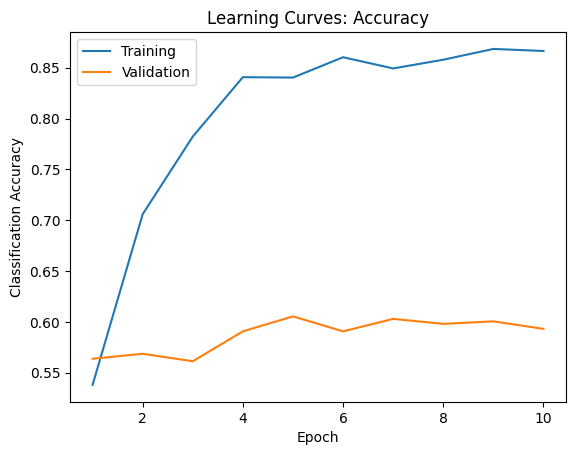

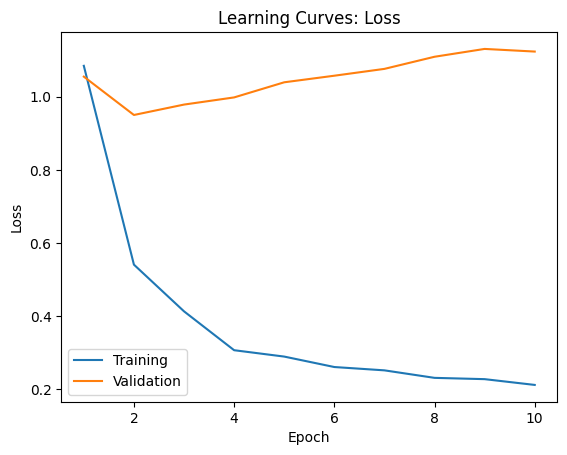

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.5917
ROC-AUC Score: 0.6094




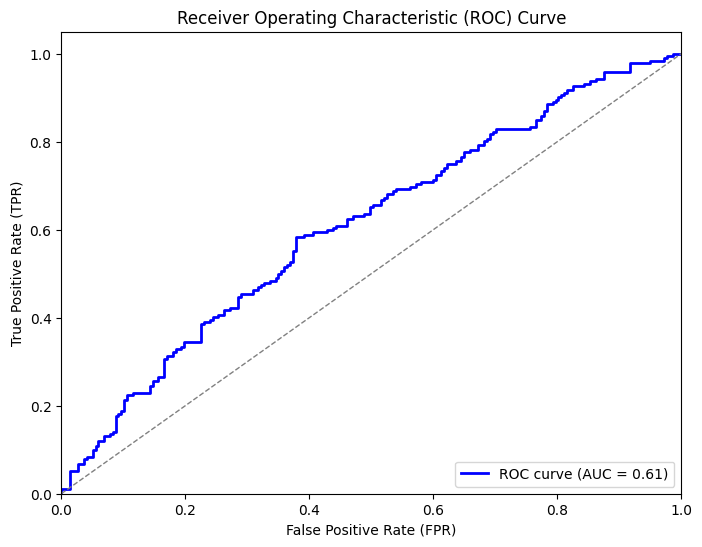

In [ ]:
# Test Model with lower learning rate

def create_model_tuned():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
     if 'conv1' in layer.name  or 'conv5' in layer.name:
        layer.trainable = True
     else:
        layer.trainable = False

    model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation = 'relu'), #add dense layers
    layers.Dense(256, activation = 'relu')


])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_tuned() # create model
optimizer = Adam(learning_rate=0.00001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(augmented_train_images, augmented_train_labels, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Epoch 1/20
77/77 [==============================] - 15s 64ms/step - loss: 25.5343 - accuracy: 0.5392 - val_loss: 23.9429 - val_accuracy: 0.5368
Epoch 2/20
77/77 [==============================] - 4s 48ms/step - loss: 22.3784 - accuracy: 0.7778 - val_loss: 21.5501 - val_accuracy: 0.5931
Epoch 3/20
77/77 [==============================] - 4s 46ms/step - loss: 19.9177 - accuracy: 0.8468 - val_loss: 19.4790 - val_accuracy: 0.5809
Epoch 4/20
77/77 [==============================] - 4s 48ms/step - loss: 17.7560 - accuracy: 0.8558 - val_loss: 17.5181 - val_accuracy: 0.6054
Epoch 5/20
77/77 [==============================] - 4s 48ms/step - loss: 15.8273 - accuracy: 0.8660 - val_loss: 15.6472 - val_accuracy: 0.6348
Epoch 6/20
77/77 [==============================] - 4s 46ms/step - loss: 14.0965 - accuracy: 0.8660 - val_loss: 14.0884 - val_accuracy: 0.6054
Epoch 7/20
77/77 [==============================] - 4s 46ms/step - loss: 12.5565 - accuracy: 0.8640 - val_loss: 12.7096 - val_accuracy: 0.625

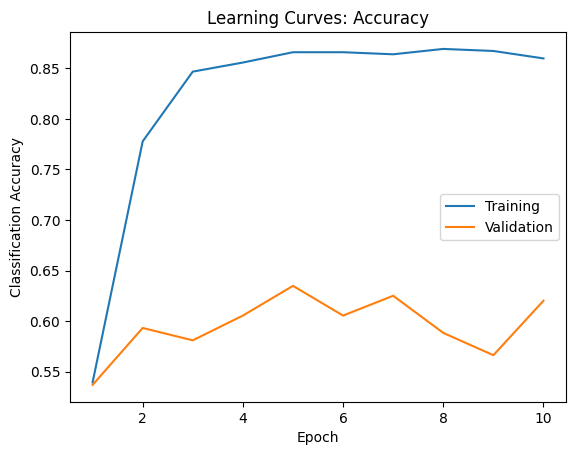

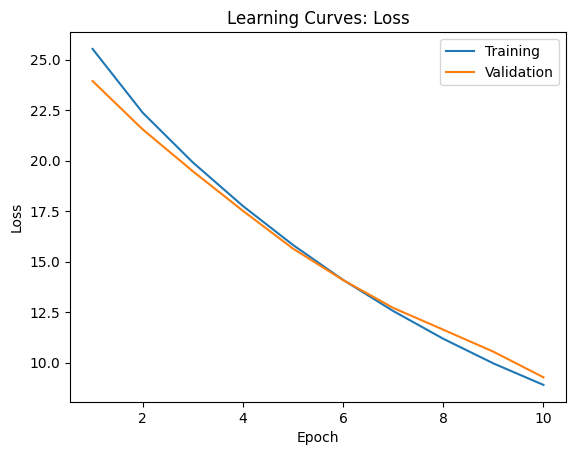

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6455
ROC-AUC Score: 0.6923




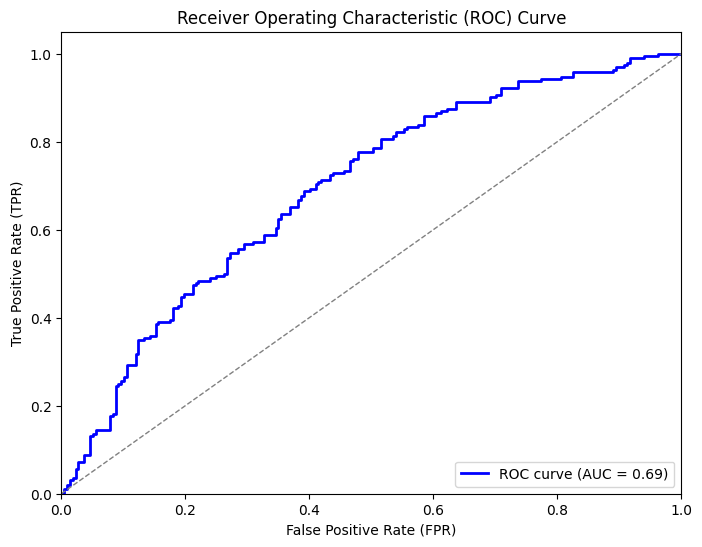

In [ ]:
# Try weight regularization
from tensorflow.keras.regularizers import l2
def create_model_tuned():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
     if 'conv1' in layer.name or 'conv5' in layer.name:
        layer.trainable = True
     else:
        layer.trainable = False

    model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.02)), #add dense layers
    layers.Dense(256, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),


])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_tuned() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(augmented_train_images, augmented_train_labels, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Epoch 1/20
77/77 [==============================] - 15s 65ms/step - loss: 13.5172 - accuracy: 0.5221 - val_loss: 12.6718 - val_accuracy: 0.6250
Epoch 2/20
77/77 [==============================] - 4s 46ms/step - loss: 11.9133 - accuracy: 0.7590 - val_loss: 11.8534 - val_accuracy: 0.6176
Epoch 3/20
77/77 [==============================] - 4s 46ms/step - loss: 10.9358 - accuracy: 0.8529 - val_loss: 11.2306 - val_accuracy: 0.6201
Epoch 4/20
77/77 [==============================] - 4s 48ms/step - loss: 10.1336 - accuracy: 0.8562 - val_loss: 10.4999 - val_accuracy: 0.6348
Epoch 5/20
77/77 [==============================] - 4s 48ms/step - loss: 9.4142 - accuracy: 0.8668 - val_loss: 9.8184 - val_accuracy: 0.6373
Epoch 6/20
77/77 [==============================] - 4s 48ms/step - loss: 8.7555 - accuracy: 0.8762 - val_loss: 9.2238 - val_accuracy: 0.6422
Epoch 7/20
77/77 [==============================] - 4s 47ms/step - loss: 8.1545 - accuracy: 0.8701 - val_loss: 9.0723 - val_accuracy: 0.6078
Epoc

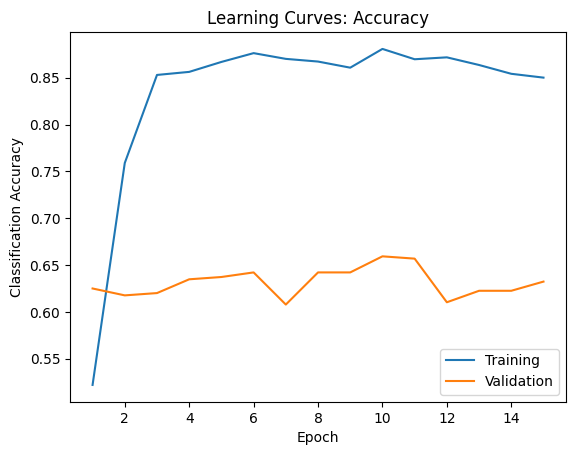

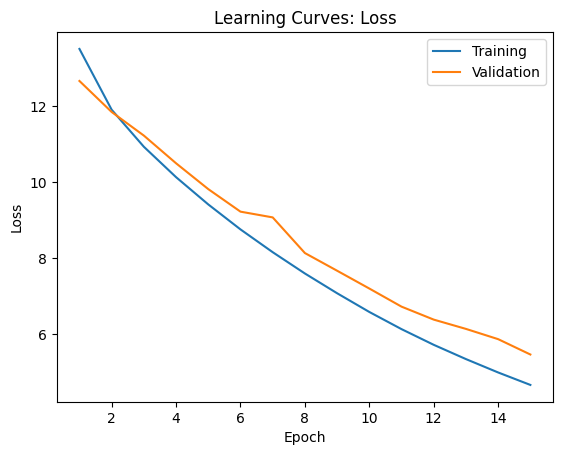

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6479
ROC-AUC Score: 0.7073




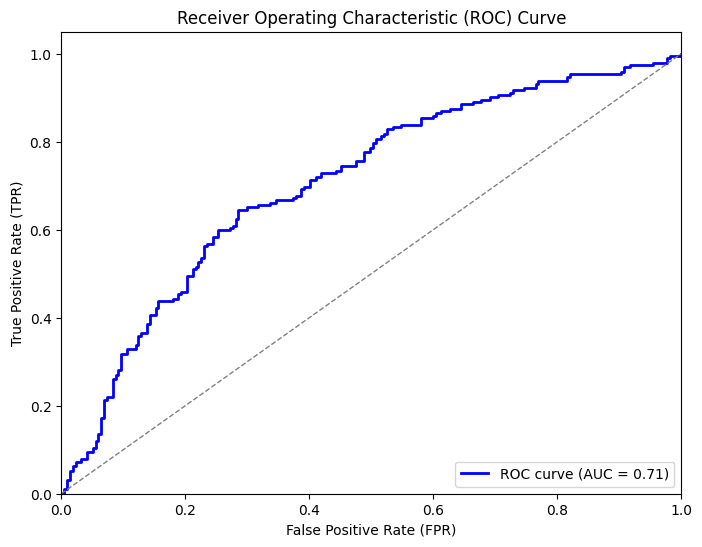

In [ ]:
# alter weights
def create_model_tuned():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
     if 'conv1' in layer.name or 'conv5' in layer.name:
        layer.trainable = True
     else:
        layer.trainable = False

    model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)), #add dense layers
    layers.Dense(256, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.005)),


])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_tuned() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(augmented_train_images, augmented_train_labels, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Epoch 1/20
77/77 [==============================] - 14s 64ms/step - loss: 25.9398 - accuracy: 0.5274 - val_loss: 24.4429 - val_accuracy: 0.5637
Epoch 2/20
77/77 [==============================] - 4s 48ms/step - loss: 23.0704 - accuracy: 0.7688 - val_loss: 22.4586 - val_accuracy: 0.6054
Epoch 3/20
77/77 [==============================] - 4s 46ms/step - loss: 21.0217 - accuracy: 0.8444 - val_loss: 20.7001 - val_accuracy: 0.6029
Epoch 4/20
77/77 [==============================] - 4s 46ms/step - loss: 19.2369 - accuracy: 0.8460 - val_loss: 19.2326 - val_accuracy: 0.6054
Epoch 5/20
77/77 [==============================] - 4s 46ms/step - loss: 17.6186 - accuracy: 0.8676 - val_loss: 17.6583 - val_accuracy: 0.6029
Epoch 6/20
77/77 [==============================] - 4s 48ms/step - loss: 16.1401 - accuracy: 0.8697 - val_loss: 16.4415 - val_accuracy: 0.6176
Epoch 7/20
77/77 [==============================] - 4s 46ms/step - loss: 14.7937 - accuracy: 0.8721 - val_loss: 15.0395 - val_accuracy: 0.605

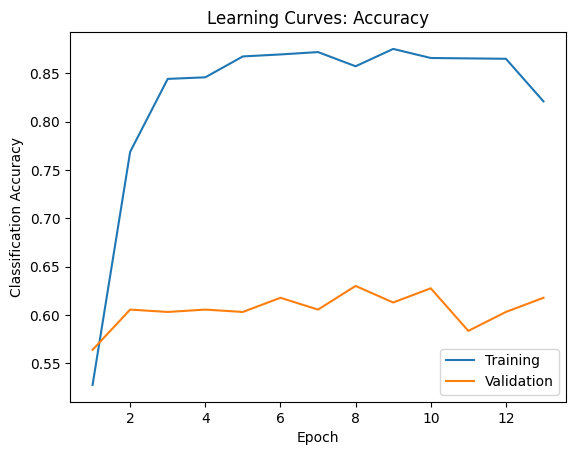

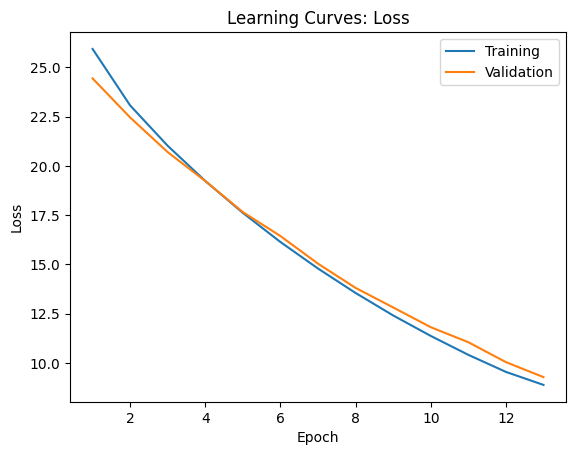

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.5892
ROC-AUC Score: 0.6503




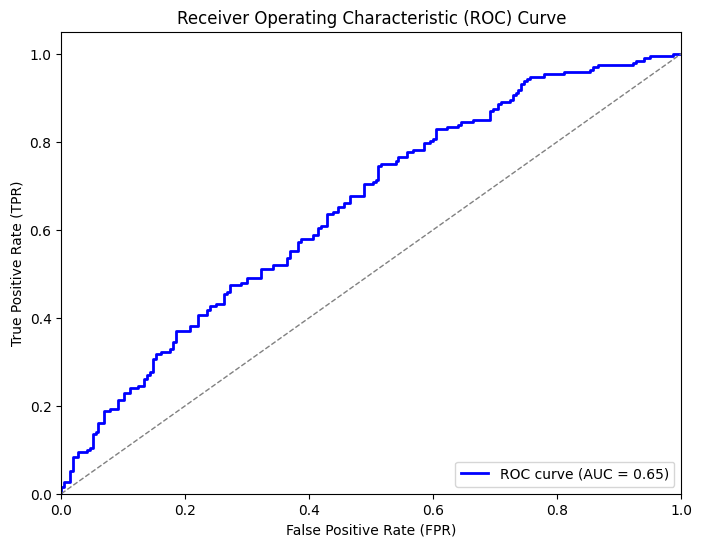

In [ ]:
# Increase number of nodes in dense layers

def create_model_tuned():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
      if 'conv1' in layer.name  or 'conv5' in layer.name:
        layer.trainable = True
      else:
        layer.trainable = False

    model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(1024, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)), #add dense layers
    layers.Dense(512, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.005)),


])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_tuned() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(augmented_train_images, augmented_train_labels, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Epoch 1/20
77/77 [==============================] - 15s 65ms/step - loss: 12.8941 - accuracy: 0.5278 - val_loss: 12.4458 - val_accuracy: 0.5490
Epoch 2/20
77/77 [==============================] - 4s 48ms/step - loss: 11.3810 - accuracy: 0.7324 - val_loss: 11.3619 - val_accuracy: 0.5539
Epoch 3/20
77/77 [==============================] - 4s 49ms/step - loss: 10.1505 - accuracy: 0.8243 - val_loss: 10.2079 - val_accuracy: 0.5931
Epoch 4/20
77/77 [==============================] - 4s 49ms/step - loss: 9.1122 - accuracy: 0.8501 - val_loss: 9.1870 - val_accuracy: 0.6446
Epoch 5/20
77/77 [==============================] - 4s 47ms/step - loss: 8.2134 - accuracy: 0.8570 - val_loss: 8.4124 - val_accuracy: 0.6348
Epoch 6/20
77/77 [==============================] - 4s 47ms/step - loss: 7.4126 - accuracy: 0.8685 - val_loss: 7.7563 - val_accuracy: 0.6250
Epoch 7/20
77/77 [==============================] - 4s 47ms/step - loss: 6.6927 - accuracy: 0.8627 - val_loss: 7.0964 - val_accuracy: 0.6225
Epoch 

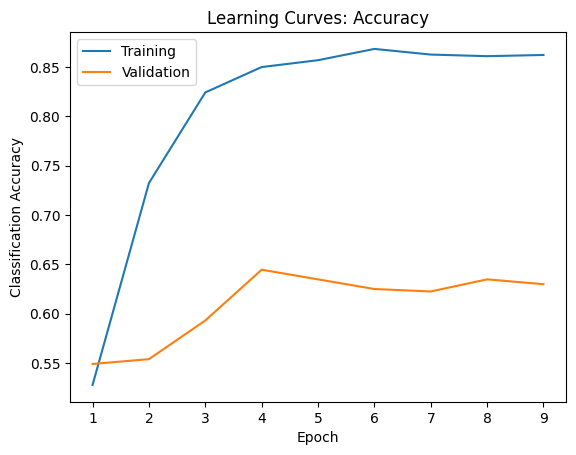

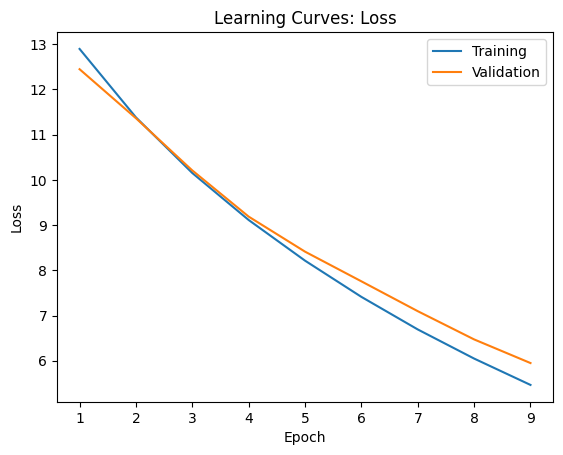

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6479
ROC-AUC Score: 0.6846




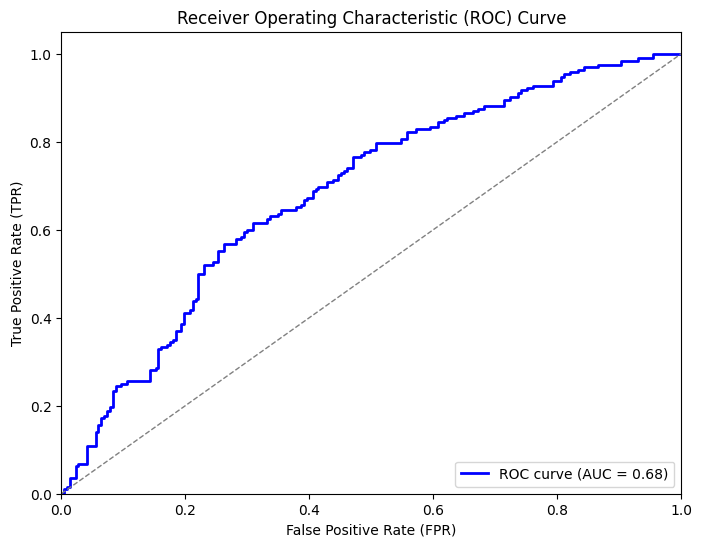

In [ ]:
# Add Batch normalization layer

def create_model_tuned():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
      if 'conv1' in layer.name  or 'conv5' in layer.name:
        layer.trainable = True
      else:
        layer.trainable = False

    model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(256, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.005)),


])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_tuned() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(augmented_train_images, augmented_train_labels, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Epoch 1/20
77/77 [==============================] - 15s 65ms/step - loss: 17.9890 - accuracy: 0.5400 - val_loss: 17.6280 - val_accuracy: 0.5392
Epoch 2/20
77/77 [==============================] - 4s 49ms/step - loss: 16.4757 - accuracy: 0.6797 - val_loss: 16.0096 - val_accuracy: 0.6275
Epoch 3/20
77/77 [==============================] - 4s 47ms/step - loss: 15.1949 - accuracy: 0.7529 - val_loss: 15.0158 - val_accuracy: 0.6054
Epoch 4/20
77/77 [==============================] - 4s 47ms/step - loss: 14.0489 - accuracy: 0.8268 - val_loss: 14.0395 - val_accuracy: 0.6152
Epoch 5/20
77/77 [==============================] - 4s 49ms/step - loss: 13.0022 - accuracy: 0.8460 - val_loss: 13.0626 - val_accuracy: 0.6544
Epoch 6/20
77/77 [==============================] - 4s 47ms/step - loss: 12.0600 - accuracy: 0.8595 - val_loss: 12.3700 - val_accuracy: 0.6152
Epoch 7/20
77/77 [==============================] - 4s 47ms/step - loss: 11.1756 - accuracy: 0.8574 - val_loss: 11.4919 - val_accuracy: 0.598

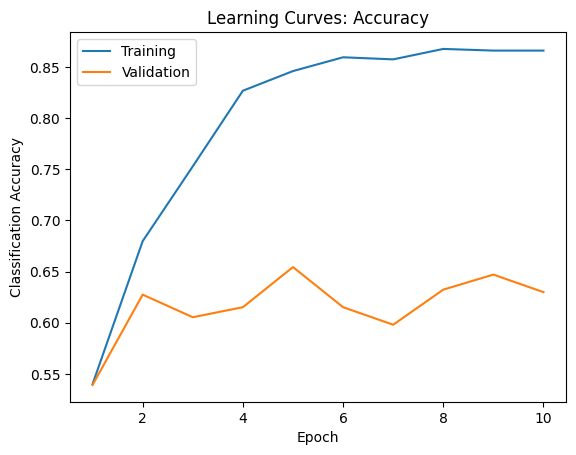

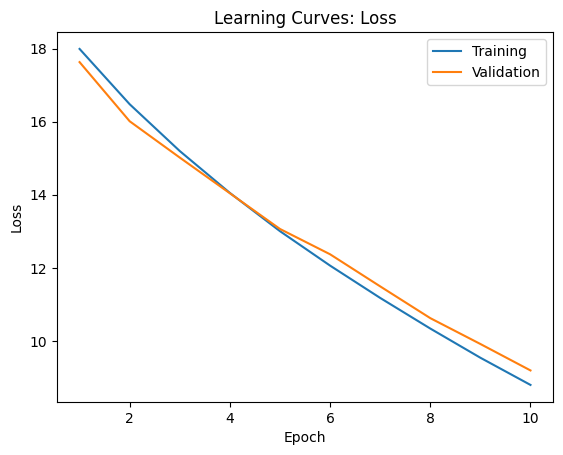

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6430
ROC-AUC Score: 0.6955




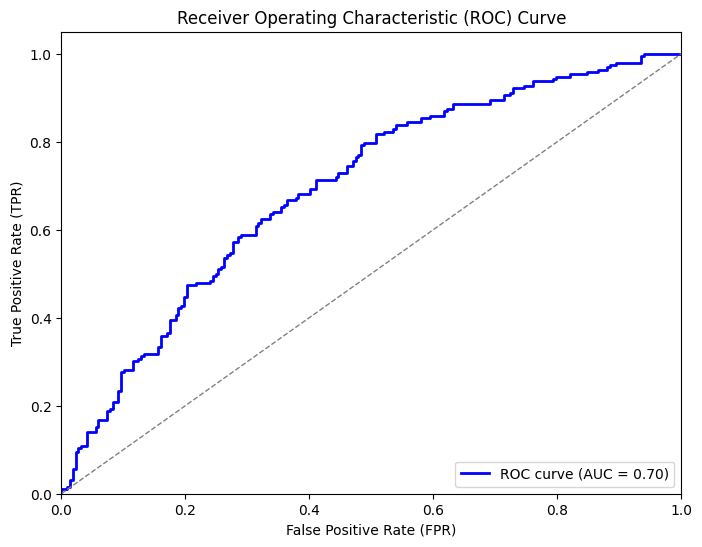

In [ ]:
# Add another Dense and Batch normalization layer

def create_model_tuned():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
      if 'conv1' in layer.name  or 'conv5' in layer.name:
        layer.trainable = True
      else:
        layer.trainable = False

    model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(256, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(128, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),


])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_tuned() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(augmented_train_images, augmented_train_labels, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Epoch 1/20
77/77 [==============================] - 16s 66ms/step - loss: 18.2503 - accuracy: 0.5196 - val_loss: 17.5912 - val_accuracy: 0.5343
Epoch 2/20
77/77 [==============================] - 4s 49ms/step - loss: 16.9609 - accuracy: 0.6013 - val_loss: 16.7197 - val_accuracy: 0.5466
Epoch 3/20
77/77 [==============================] - 4s 49ms/step - loss: 15.9306 - accuracy: 0.6520 - val_loss: 15.5292 - val_accuracy: 0.5882
Epoch 4/20
77/77 [==============================] - 4s 50ms/step - loss: 14.9945 - accuracy: 0.6834 - val_loss: 14.7085 - val_accuracy: 0.6324
Epoch 5/20
77/77 [==============================] - 4s 48ms/step - loss: 14.1461 - accuracy: 0.7373 - val_loss: 13.9789 - val_accuracy: 0.6324
Epoch 6/20
77/77 [==============================] - 4s 48ms/step - loss: 13.3681 - accuracy: 0.7708 - val_loss: 13.4580 - val_accuracy: 0.6275
Epoch 7/20
77/77 [==============================] - 4s 49ms/step - loss: 12.6233 - accuracy: 0.8162 - val_loss: 12.8591 - val_accuracy: 0.652

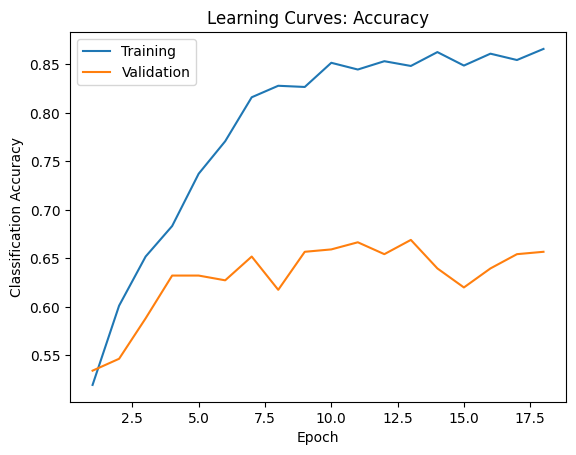

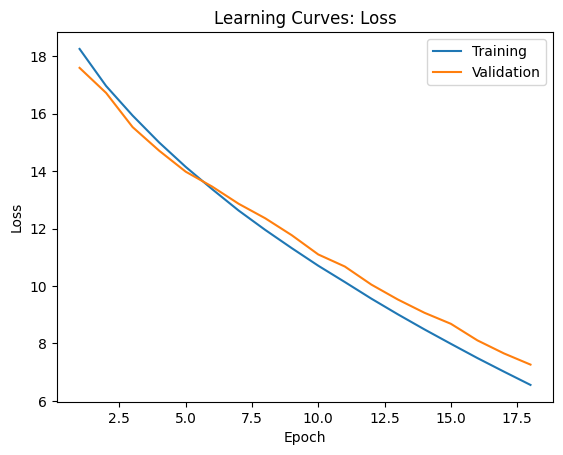

13/13 [==============================] - 1s 16ms/step


Accuracy Score: 0.6577
ROC-AUC Score: 0.7132




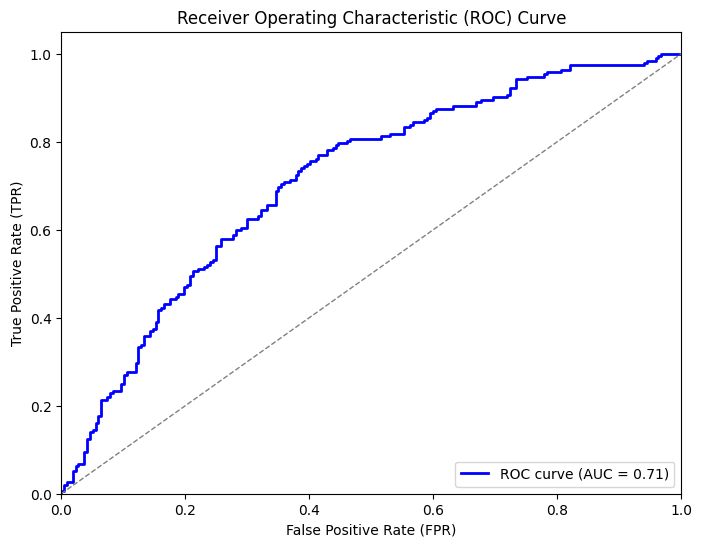

In [ ]:
# Try dropout again

def create_model_tuned():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
      if 'conv1' in layer.name  or 'conv5' in layer.name:
        layer.trainable = True
      else:
        layer.trainable = False

        model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(256, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(128, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.Dropout(0.5)

])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_tuned() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(augmented_train_images, augmented_train_labels, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Epoch 1/50
77/77 [==============================] - 17s 68ms/step - loss: 18.5446 - accuracy: 0.5180 - val_loss: 18.6693 - val_accuracy: 0.4706
Epoch 2/50
77/77 [==============================] - 4s 51ms/step - loss: 17.7185 - accuracy: 0.6103 - val_loss: 17.3816 - val_accuracy: 0.6225
Epoch 3/50
77/77 [==============================] - 4s 50ms/step - loss: 16.9766 - accuracy: 0.6785 - val_loss: 16.7148 - val_accuracy: 0.6299
Epoch 4/50
77/77 [==============================] - 4s 50ms/step - loss: 16.2186 - accuracy: 0.7377 - val_loss: 16.1217 - val_accuracy: 0.6299
Epoch 5/50
77/77 [==============================] - 4s 50ms/step - loss: 15.4770 - accuracy: 0.7569 - val_loss: 15.4971 - val_accuracy: 0.6446
Epoch 6/50
77/77 [==============================] - 4s 50ms/step - loss: 14.7347 - accuracy: 0.7827 - val_loss: 14.8491 - val_accuracy: 0.6716
Epoch 7/50
77/77 [==============================] - 4s 48ms/step - loss: 14.0048 - accuracy: 0.8178 - val_loss: 14.1757 - val_accuracy: 0.644

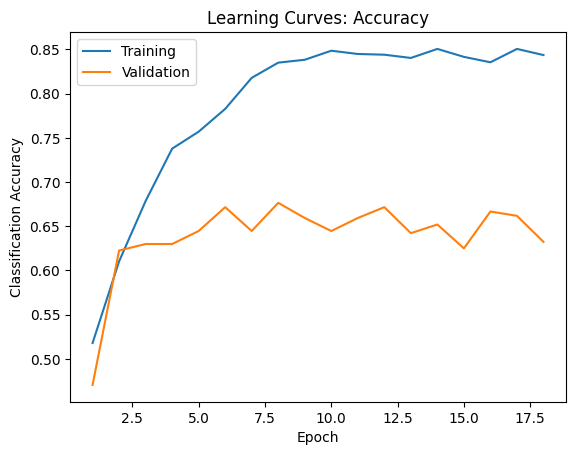

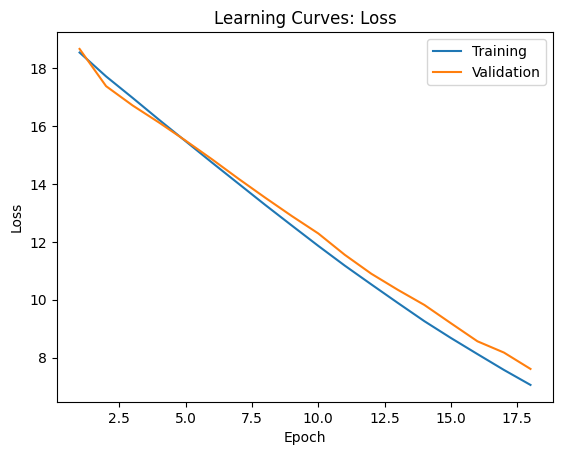

13/13 [==============================] - 1s 15ms/step


Accuracy Score: 0.6553
ROC-AUC Score: 0.6888




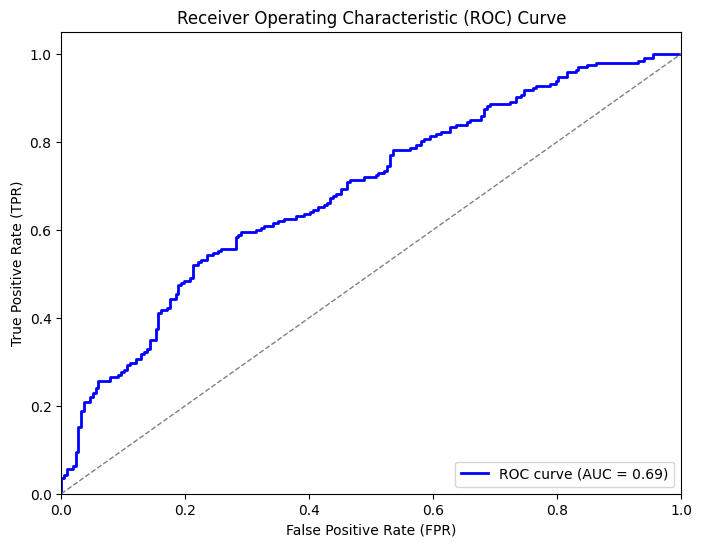

In [ ]:
# Run with 50 epochs and higher patience. Add BatchNormalization layer after pooling layer.

def create_model_tuned():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
      if 'conv1' in layer.name  or 'conv5' in layer.name:
        layer.trainable = True
      else:
        layer.trainable = False

        model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.BatchNormalization(),
    layers.Dense(512, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(256, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(128, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.Dropout(0.5)

])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_tuned() # create model
optimizer = Adam(learning_rate=0.0001) # declare optimizer and learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy']) # compile model with binary crossentropy for binary classification

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(augmented_train_images, augmented_train_labels, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)

Try Scheduled learning rate with focus on validation accuracy.

Epoch 1/50
77/77 [==============================] - 17s 68ms/step - loss: 18.3048 - accuracy: 0.5102 - val_loss: 17.8938 - val_accuracy: 0.5172 - lr: 1.0000e-04
Epoch 2/50
77/77 [==============================] - 4s 49ms/step - loss: 17.0987 - accuracy: 0.5886 - val_loss: 16.8445 - val_accuracy: 0.5539 - lr: 1.0000e-04
Epoch 3/50
77/77 [==============================] - 4s 49ms/step - loss: 16.1150 - accuracy: 0.6364 - val_loss: 15.7755 - val_accuracy: 0.6005 - lr: 1.0000e-04
Epoch 4/50
77/77 [==============================] - 4s 49ms/step - loss: 15.2098 - accuracy: 0.6712 - val_loss: 14.9877 - val_accuracy: 0.6446 - lr: 1.0000e-04
Epoch 5/50
77/77 [==============================] - 4s 49ms/step - loss: 14.3875 - accuracy: 0.7369 - val_loss: 14.2592 - val_accuracy: 0.6471 - lr: 1.0000e-04
Epoch 6/50
77/77 [==============================] - 4s 49ms/step - loss: 13.6170 - accuracy: 0.7700 - val_loss: 13.6940 - val_accuracy: 0.6593 - lr: 1.0000e-04
Epoch 7/50
77/77 [=====================

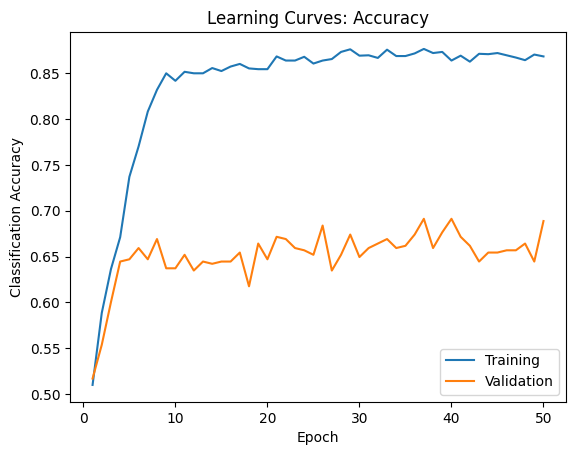

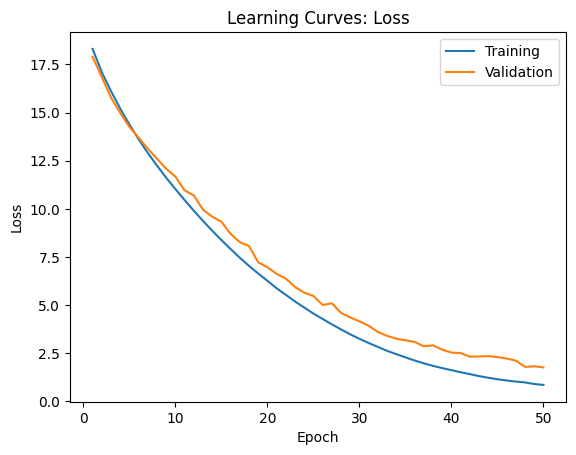

13/13 [==============================] - 1s 16ms/step


Accuracy Score: 0.6479
ROC-AUC Score: 0.6907




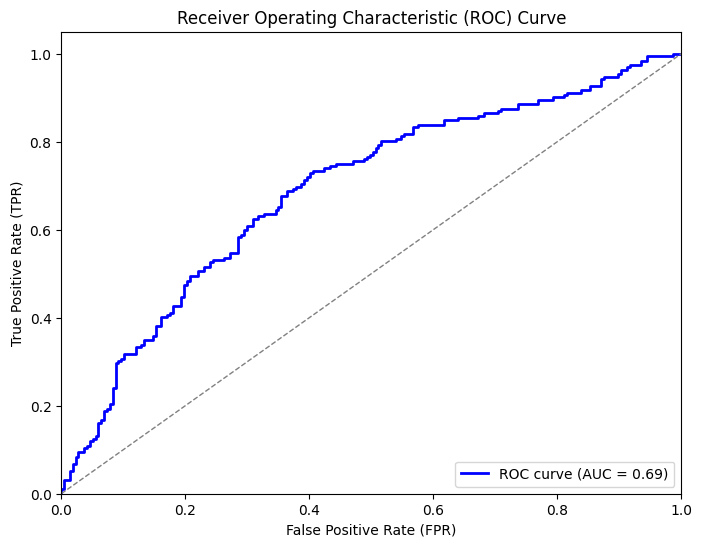

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

def create_model_scheduled():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze first two and last layer
    for layer in resnet_model.layers:
      if 'conv1' in layer.name  or 'conv5' in layer.name:
        layer.trainable = True
      else:
        layer.trainable = False

    model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(256, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(128, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.Dropout(0.5)

])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model

model = create_model_scheduled()

initial_lr = 0.0001 # Initial learning rate
optimizer = Adam(learning_rate=initial_lr)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.95, patience=5, min_lr=1e-6, verbose=1) # create callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True) # Raise Patience in early stopping to allow for adjusting learning rate
history = model.fit(augmented_train_images, augmented_train_labels, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr,early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)


Epoch 1/50
77/77 [==============================] - 40s 76ms/step - loss: 18.3354 - accuracy: 0.4918 - val_loss: 18.0397 - val_accuracy: 0.5123 - lr: 1.0000e-04
Epoch 2/50
77/77 [==============================] - 4s 57ms/step - loss: 17.1775 - accuracy: 0.5760 - val_loss: 16.7017 - val_accuracy: 0.5294 - lr: 1.0000e-04
Epoch 3/50
77/77 [==============================] - 4s 57ms/step - loss: 16.2698 - accuracy: 0.5837 - val_loss: 15.9896 - val_accuracy: 0.5588 - lr: 1.0000e-04
Epoch 4/50
77/77 [==============================] - 4s 57ms/step - loss: 15.4453 - accuracy: 0.6205 - val_loss: 15.1039 - val_accuracy: 0.6176 - lr: 1.0000e-04
Epoch 5/50
77/77 [==============================] - 4s 57ms/step - loss: 14.7037 - accuracy: 0.6471 - val_loss: 14.4688 - val_accuracy: 0.6225 - lr: 1.0000e-04
Epoch 6/50
77/77 [==============================] - 4s 58ms/step - loss: 13.9667 - accuracy: 0.7006 - val_loss: 13.9411 - val_accuracy: 0.6446 - lr: 1.0000e-04
Epoch 7/50
77/77 [=====================

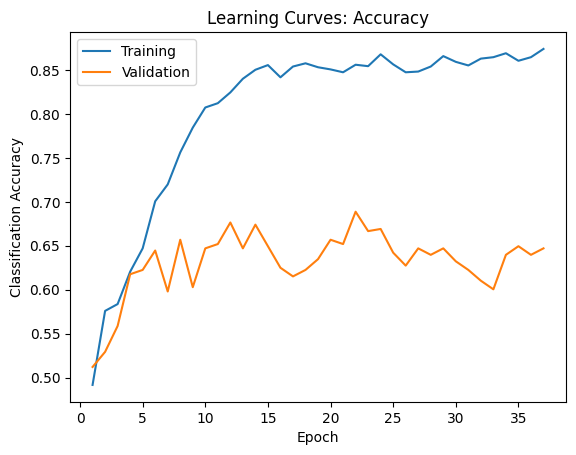

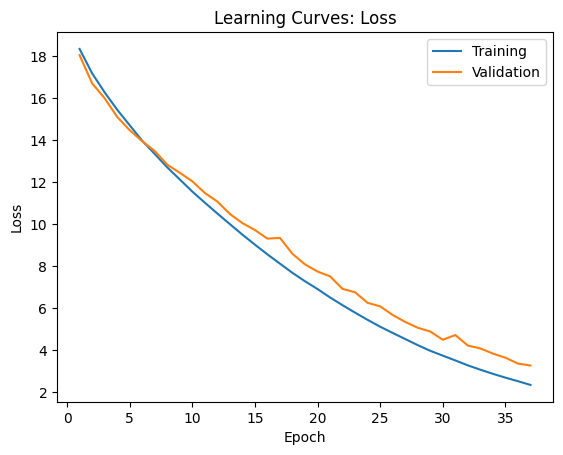

13/13 [==============================] - 1s 16ms/step


Accuracy Score: 0.7042
ROC-AUC Score: 0.7537




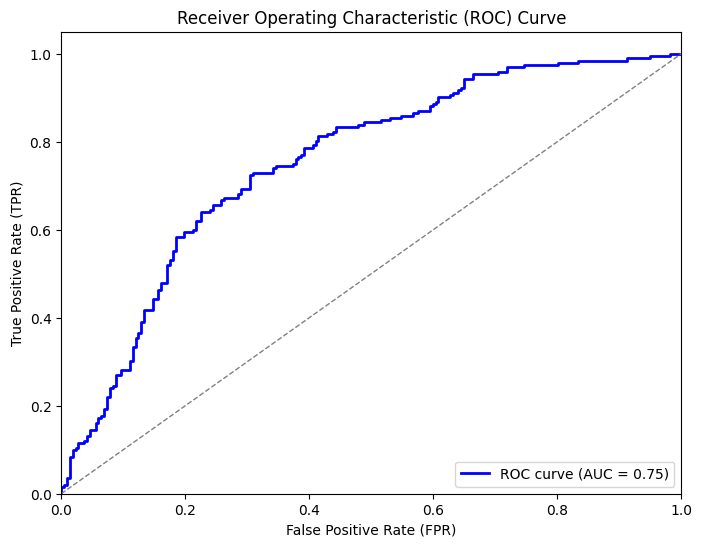

In [ ]:
# Try tuned model with ALL ResNet layers unfrozen

from tensorflow.keras.callbacks import ReduceLROnPlateau

def create_model_scheduled():

    resnet_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

     #Unfreeze layers
    for layer in resnet_model.layers:
        layer.trainable = True


    model = models.Sequential([
    resnet_model, # add resnet model
    layers.GlobalMaxPooling2D(),
    layers.Dense(512, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(256, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.BatchNormalization(), # Add Batch Normalization layer
    layers.Dense(128, activation = 'relu', kernel_initializer="he_normal", kernel_regularizer=l2(0.01)),
    layers.Dropout(0.5)

])
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification
    return model


# Create model
model = create_model_scheduled()

# Define the optimizer (e.g., Adam) with an initial learning rate
initial_lr = 0.0001
optimizer = Adam(learning_rate=initial_lr)

# Compile  model with the optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Create the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.95, patience=5, min_lr=1e-6, verbose=1)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True) # Implement early stopping to moniter validation accuracy
history = model.fit(augmented_train_images, augmented_train_labels, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr,early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test) # Test model on test set
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
plot_learning_curves(history)
model_roc = accuracy_roc_inception(model, X_test, y_test)


##Model Comparison (ResNet-50)

While initially the base model with all layers unfrozen did not perform as well, after freezing middle layers and tuning parameters and then unfreezing all layers once again, the Accuracy and ROC scores rose from 0.61 and 0.68 to 0.7 and 0.75 respectively.


#**5.3 VGG16**

#Fine-tune the model (e.g. hyperparameters tuning):

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam

# Function to create VGG16 model with different hyperparameters
def create_vgg16_model(input_shape, num_classes, learning_rate=0.001):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze all layers by default
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Create VGG16 model
vgg16_model = create_vgg16_model(input_shape, num_classes)

# Display model summary
vgg16_model.summary()


## Base model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam

# Function to create VGG16 model with different hyperparameters
def create_vgg16_model(input_shape, num_classes, learning_rate=0.001):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze all layers by default
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2

# Create VGG16 model
vgg16_model = create_vgg16_model(input_shape, num_classes)

# Display model summary
vgg16_model.summary()


### Showing model visualisations

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ROC curve
y_pred_probs = vgg16_model.predict(X_test_normalized)
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_probs[:, 1])
roc_auc = roc_auc_score(y_test[:, 1], y_pred_probs[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and loaded the model
# (vgg16_model) and made predictions (y_pred_probs) on the test set

# Convert predicted probabilities to class labels (0 or 1)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Create a nice 2x2 confusion matrix plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14}, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5, 1.5], ['Real', 'Fake'])
plt.yticks([0.5, 1.5], ['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.show()


## Different learning rate

In [ ]:
# Create VGG16 model
vgg16_model_hyp = create_vgg16_model(input_shape, num_classes, learning_rate = 0.0001)

# Display model summary
vgg16_model_hyp.summary()


# Training the model
epochs = 3
batch_size = 32

history_hyp = vgg16_model_hyp.fit(
    X_train_normalized, y_train,
    validation_data=(X_val_normalized, y_val),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# Evaluating the model on the test set
test_loss, test_accuracy = vgg16_model_hyp.evaluate(X_test_normalized, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


## Unfreezing last layer

In [ ]:
for layer in vgg16_model.layers[-4:]:
    layer.trainable = True


# Create VGG16 model
vgg16_model_freeze_last = create_vgg16_model(input_shape, num_classes, learning_rate = 0.0001)

# Display model summary
vgg16_model_freeze_last.summary()


# Training the model
epochs = 1
batch_size = 32

history_freeze_last = vgg16_model_freeze_last.fit(
    X_train_normalized, y_train,
    validation_data=(X_val_normalized, y_val),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# Evaluating the model on the test set
test_loss, test_accuracy = vgg16_model_freeze_last.evaluate(X_test_normalized, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


# Save the model and its history
model_filename = '/content/drive/MyDrive/deep_learning_project/sean_model/vgg16_model_freeze_last.h5'
history_filename = '/content/drive/MyDrive/deep_learning_project/sean_model/vgg16_history_freeze_last.pkl'
save_model_and_history(vgg16_model_freeze_last, vgg16_model_freeze_last, model_filename, history_filename)

## Unfreezing all layers

In [ ]:
for layer in vgg16_model.layers:
    layer.trainable = True


# Create VGG16 model
vgg16_model_freeze_all = create_vgg16_model(input_shape, num_classes, learning_rate = 0.0001)

# Display model summary
vgg16_model_freeze_all.summary()


# Training the model
epochs = 3
batch_size = 32

history_freeze_all = vgg16_model_freeze_all.fit(
    X_train_normalized, y_train,
    validation_data=(X_val_normalized, y_val),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

# Evaluating the model on the test set
test_loss, test_accuracy = vgg16_model_freeze_all.evaluate(X_test_normalized, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


# Save the model and its history
model_filename = '/content/drive/MyDrive/deep_learning_project/sean_model/vgg16_model_freeze_all.h5'
history_filename = '/content/drive/MyDrive/deep_learning_project/sean_model/vgg16_model_freeze_all.pkl'
save_model_and_history(vgg16_model_hyp, history_hyp, model_filename, history_filename)

##**6. Conclusion**

While the ResNet50 and Inception models reached comparable acuracy scores (70% and 73% respectively), we have found the model which performed most optimally to be version 6 of the Inception model, due to it's higher AUC (0.82 compared to the ResNet's 0.75).